# In The Name Of God
## Algorithms For Data Science
## Supervisor: Dr. Ali Katanforoush

### Sohrab Faridi: 97422188
### Mohammad Azodi: 97422174

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep= ';')


In [3]:
df_tree = pd.read_csv('bank-additional-full.csv', sep= ';')

## Summary of data

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [8]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


## Age variable

In [9]:
df['age'].value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64

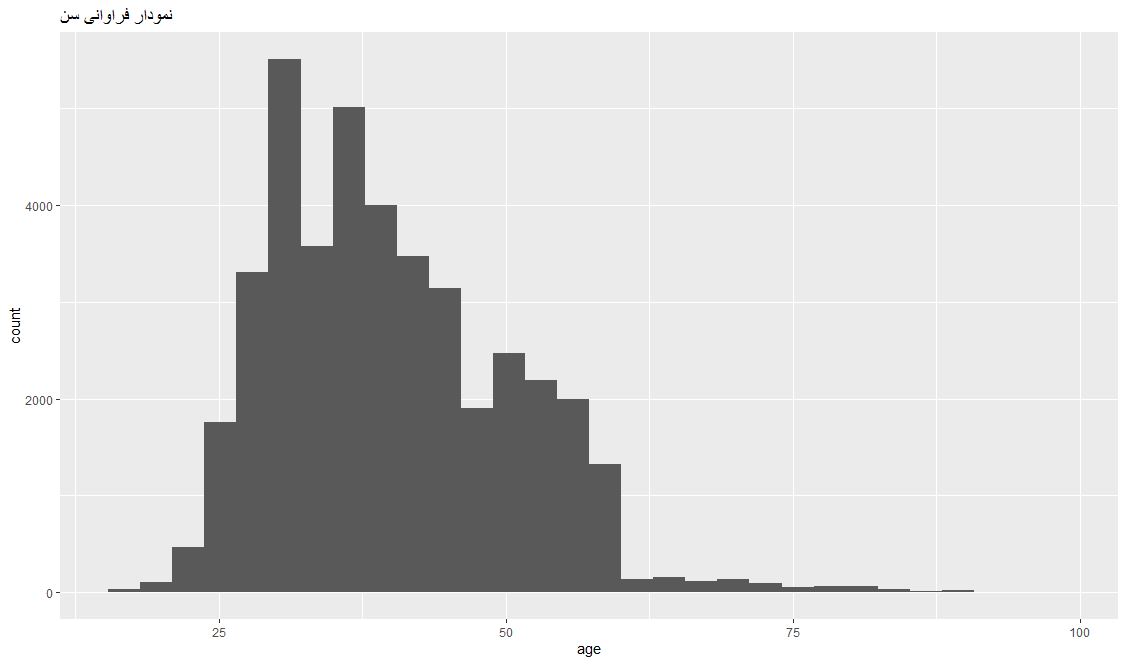

In [10]:
df['age'].quantile([.25, .5, .75])

0.25    32.0
0.50    38.0
0.75    47.0
Name: age, dtype: float64

In [11]:
df.loc[df['age'] < 32, 'age'] = 25
df.loc[(df['age'] >= 32)&(df.age <= 47),'age'] = 40
df.loc[df['age'] > 47,'age'] = 72
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,72,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,72,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,40,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,72,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


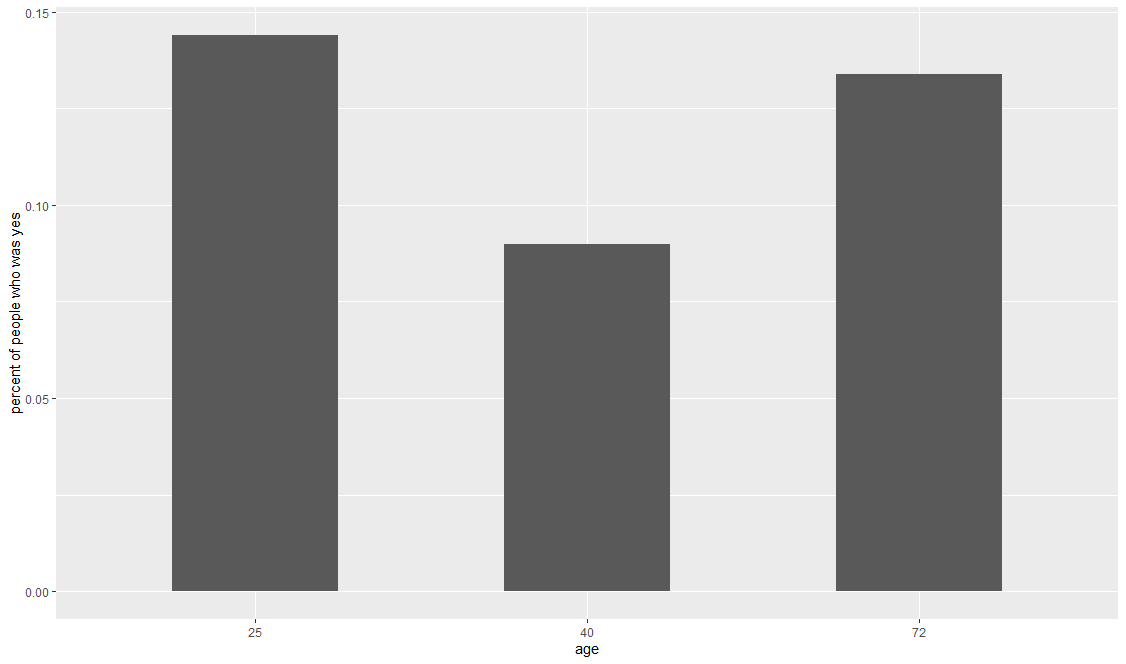

In [12]:
df['age']= (df['age']-df['age'].mean())/(df['age'].max()-df['age'].min())

## Duration variable
### : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

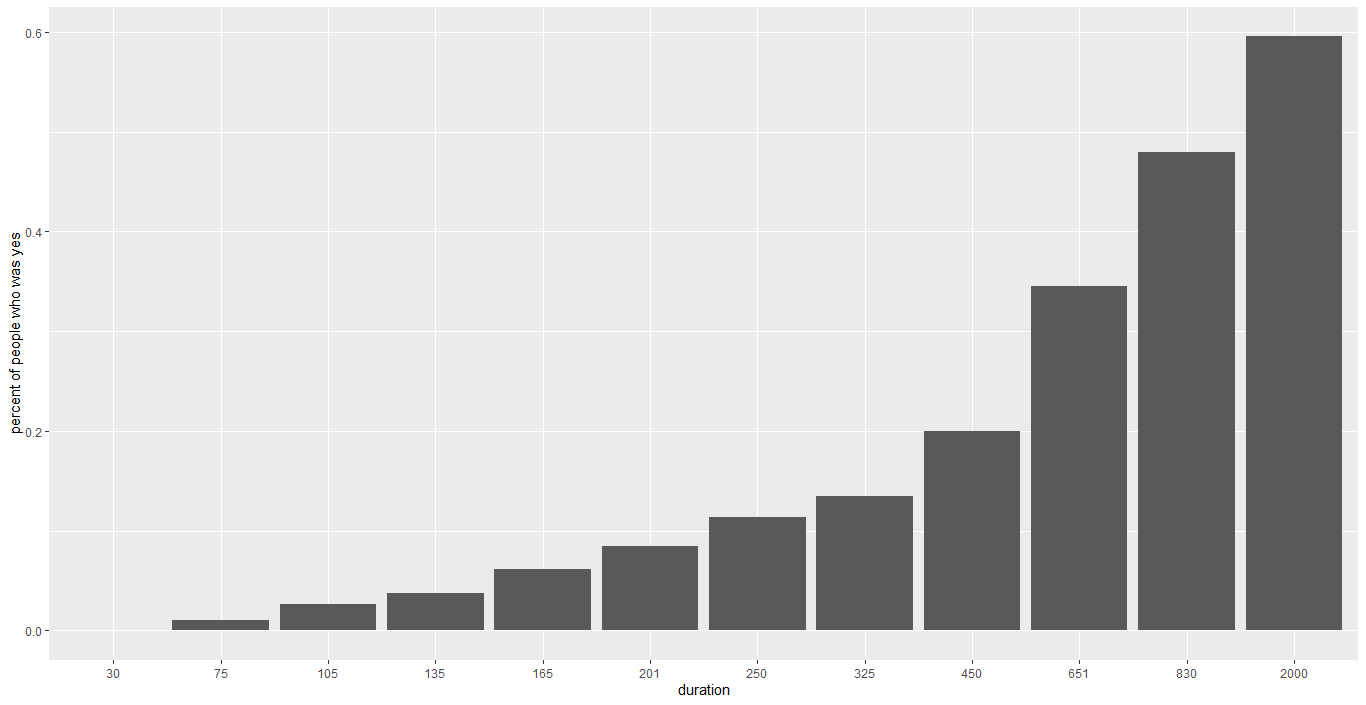

## Job variable
### type of job 

In [13]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

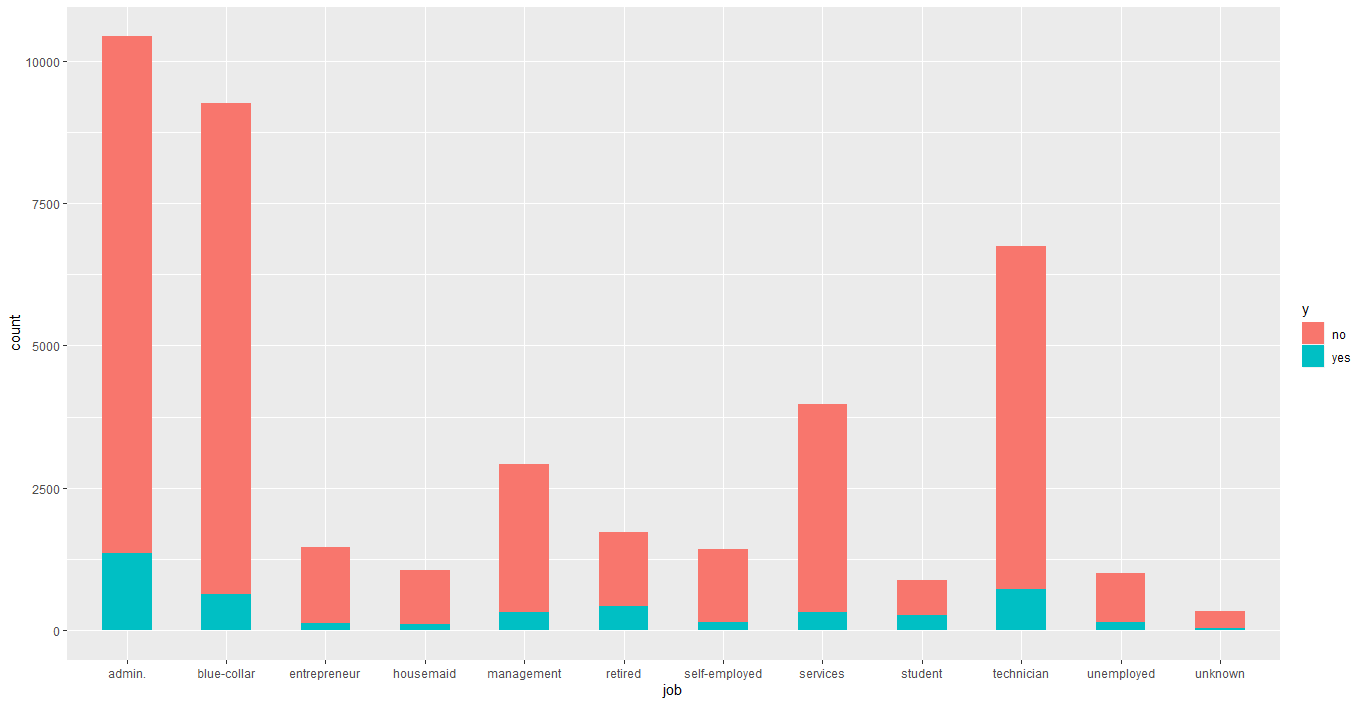

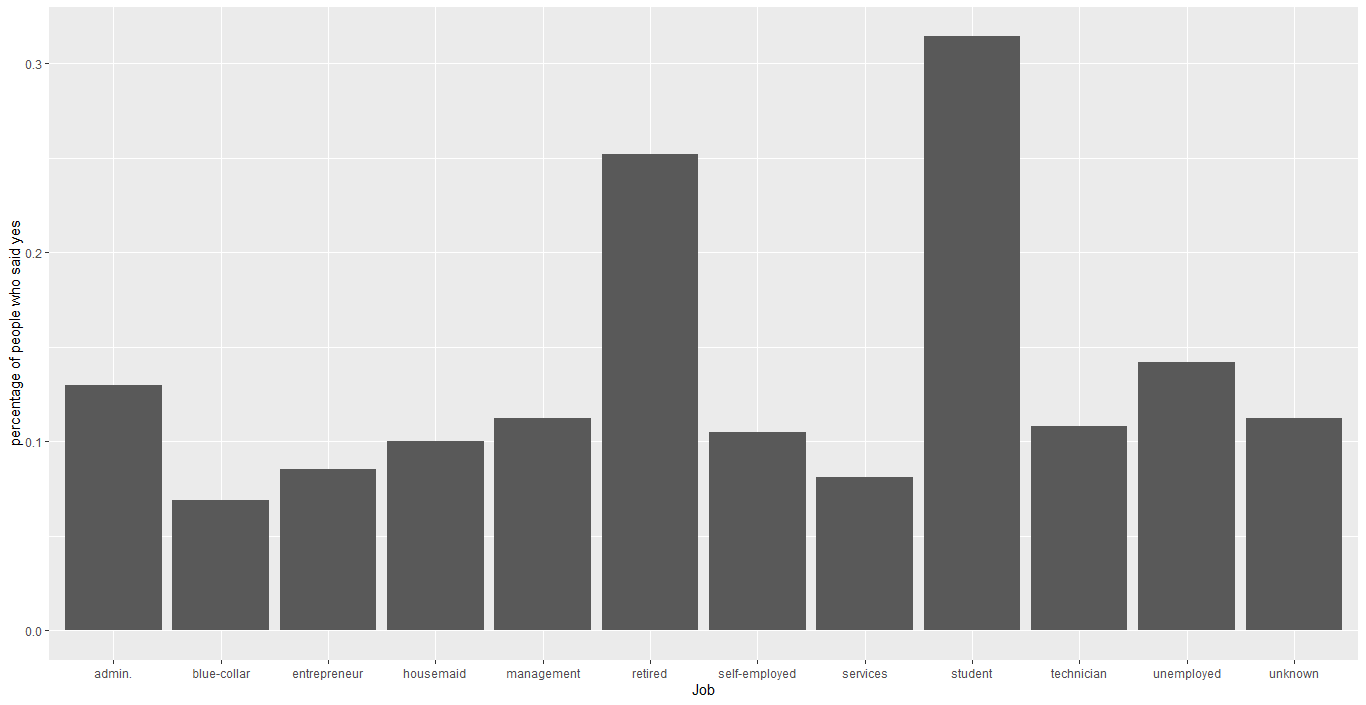

In [14]:
dummy_job= pd.get_dummies(df['job'], drop_first=True)

In [15]:
dummy_job.head()

,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [16]:
df= pd.concat([df, dummy_job], axis=1)

In [17]:
dummy_job_tree= pd.get_dummies(df_tree['job'], drop_first=True)

In [18]:
df_tree= pd.concat([df_tree, dummy_job_tree], axis=1)

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
0,0.589942,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,1,0,0,0,0,0,0,0,0
1,0.589942,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
2,-0.090910,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0
3,-0.090910,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,0,0
4,0.589942,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,0,0,1,0,0,0,0


In [20]:
#21+ 12= 33
df.shape

(41188, 32)

## Martial variable
###  marital status 

In [21]:
df.marital.unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

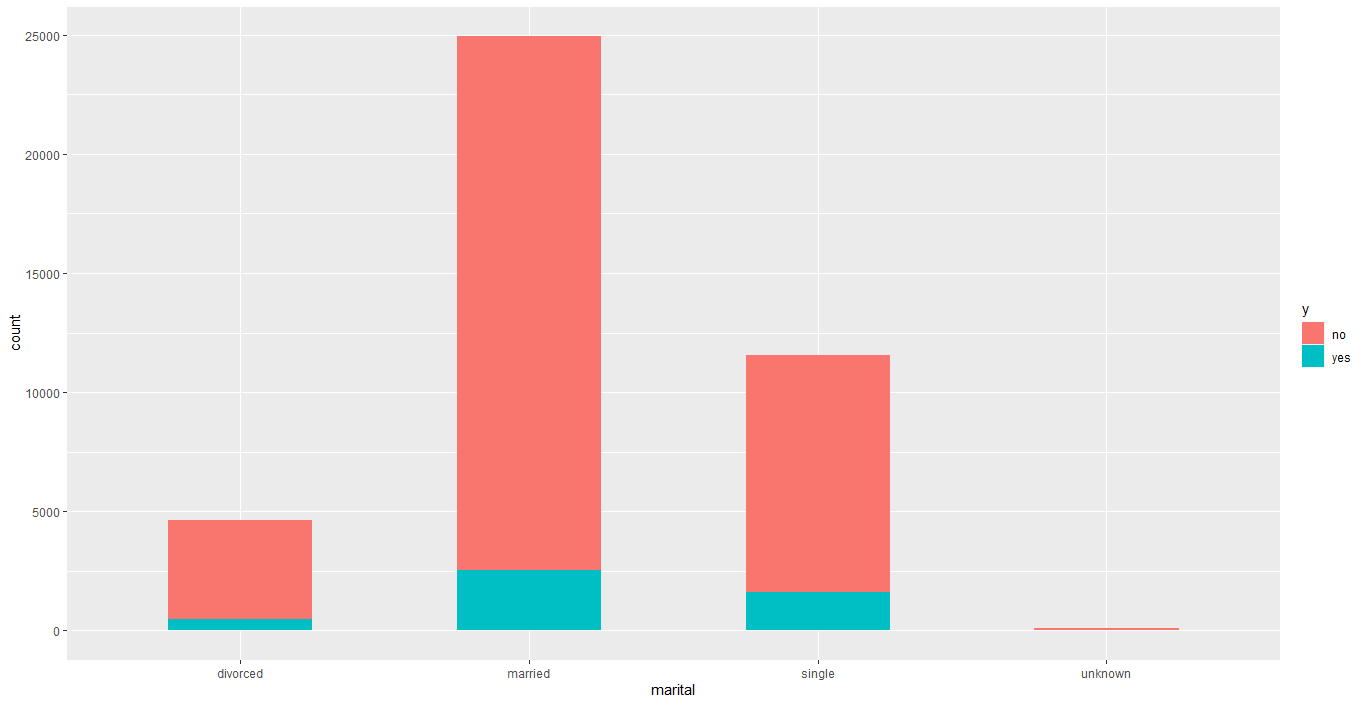

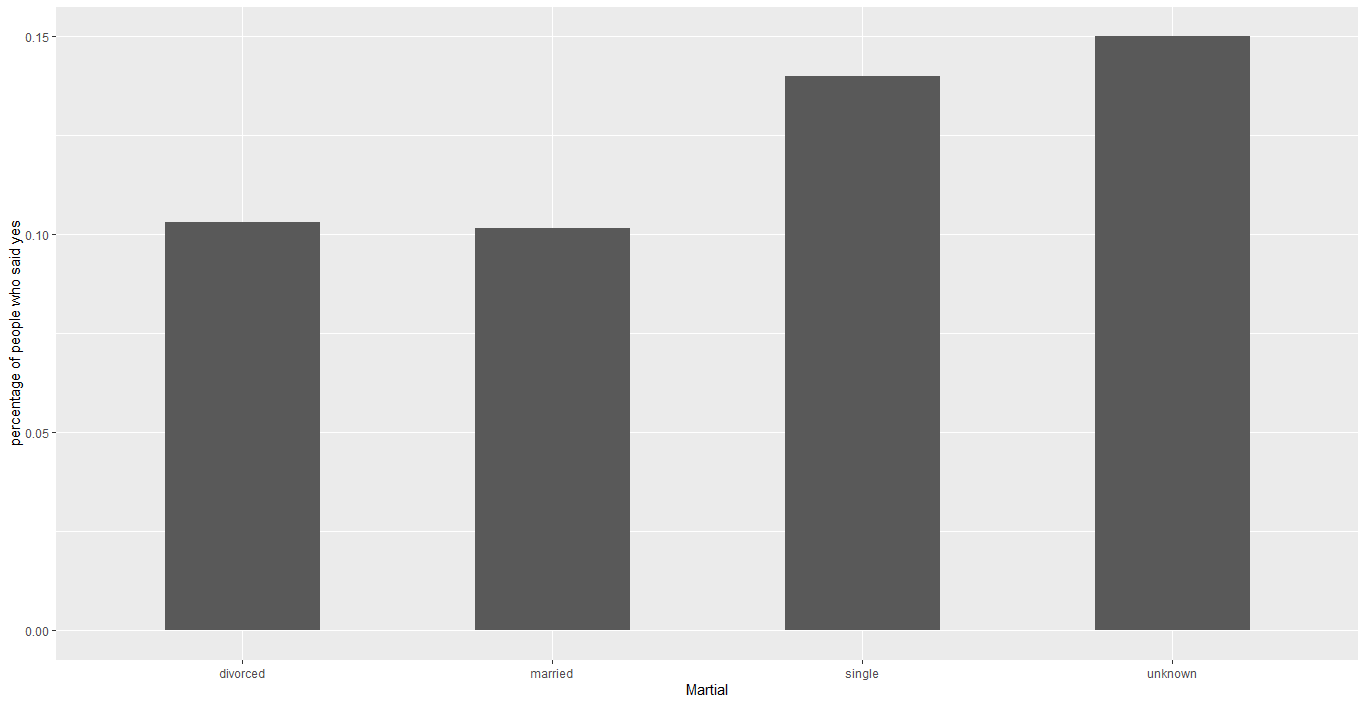

### According to that unknown martial is rare and it behave like single we can put them in one variable together for dimensional reduction

In [22]:
df[df['marital']== 'unknown'].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
40,0.589942,management,unknown,university.degree,no,yes,no,telephone,may,mon,...,0,0,1,0,0,0,0,0,0,0
390,0.589942,retired,unknown,university.degree,unknown,no,no,telephone,may,tue,...,0,0,0,1,0,0,0,0,0,0
413,0.589942,retired,unknown,basic.4y,no,no,no,telephone,may,tue,...,0,0,0,1,0,0,0,0,0,0
1493,-0.090910,services,unknown,high.school,no,yes,yes,telephone,may,thu,...,0,0,0,0,0,1,0,0,0,0
1608,-0.090910,unknown,unknown,university.degree,no,no,no,telephone,may,fri,...,0,0,0,0,0,0,0,0,0,1


In [23]:
df[df['marital']== 'unknown'].shape

(80, 32)

In [24]:
df.loc[df['marital'] == 'unknown','marital'] = 'single'

In [25]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [26]:
marital_dummy= pd.get_dummies(df['marital'], drop_first=True)

In [27]:
marital_dummy.head()

,married,single
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [28]:
df= pd.concat([df, marital_dummy], axis=1)

In [29]:
df_tree= pd.concat([df_tree, marital_dummy], axis=1)

In [30]:
#32+ 3= 35
df.shape

(41188, 34)

In [31]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,management,retired,self-employed,services,student,technician,unemployed,unknown,married,single
0,0.589942,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
1,0.589942,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,-0.090910,services,married,high.school,no,yes,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,-0.090910,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0,0,0,0,0,0,0,0,1,0
4,0.589942,services,married,high.school,no,no,yes,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


## Education variable

In [32]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

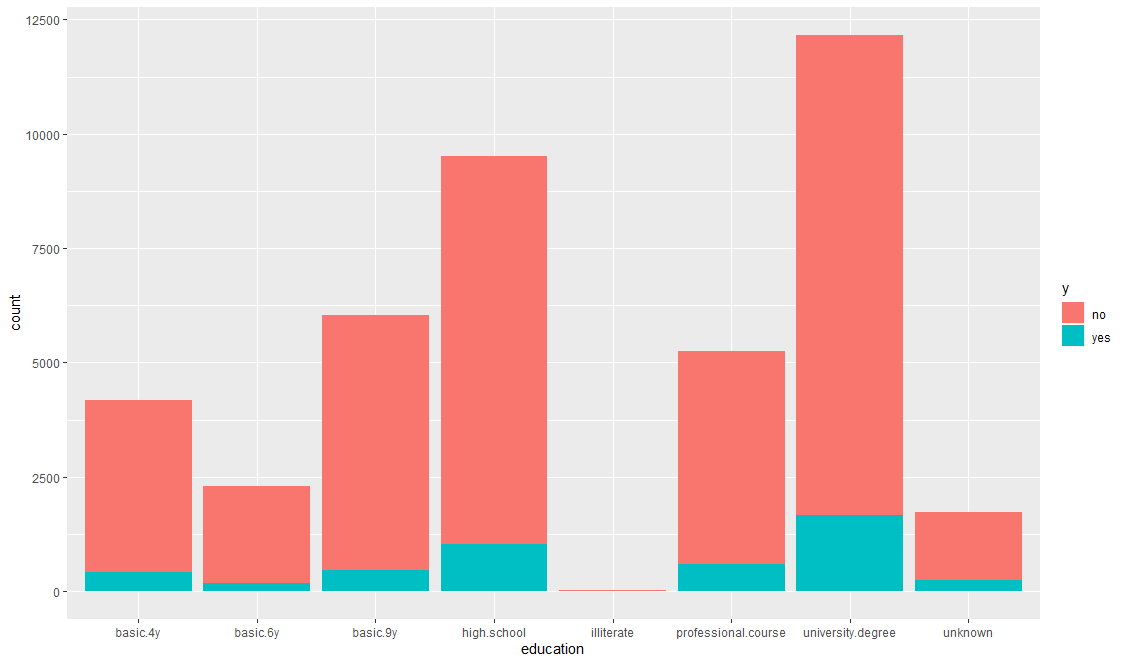

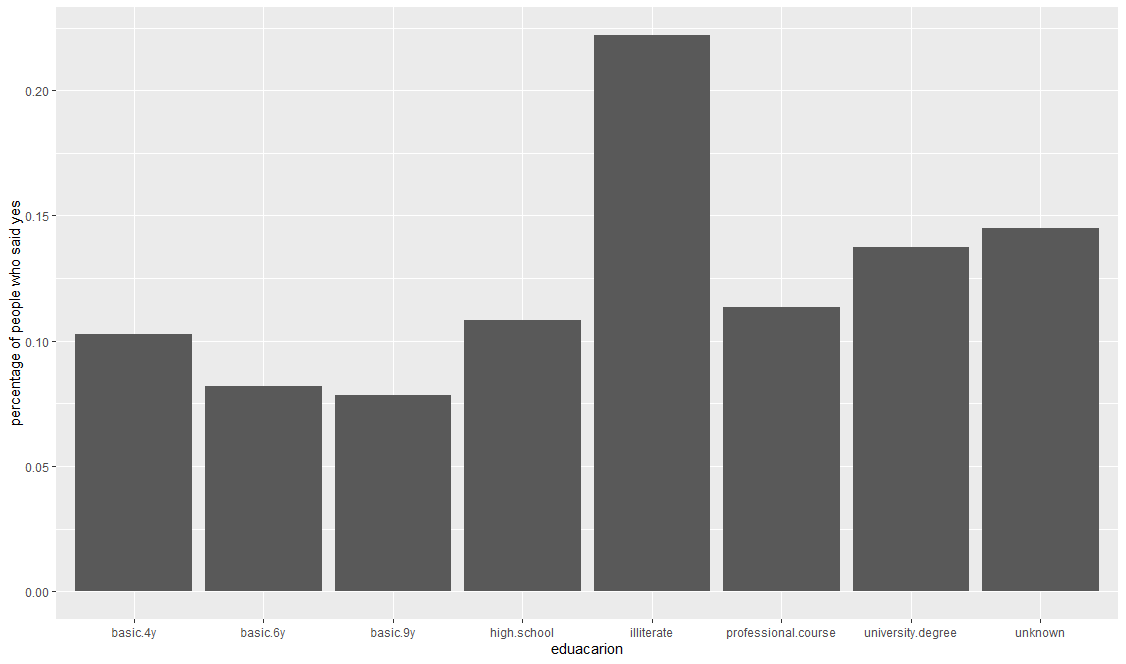

### When we get the test set it would not have unknown data so we shuld do some thing about it


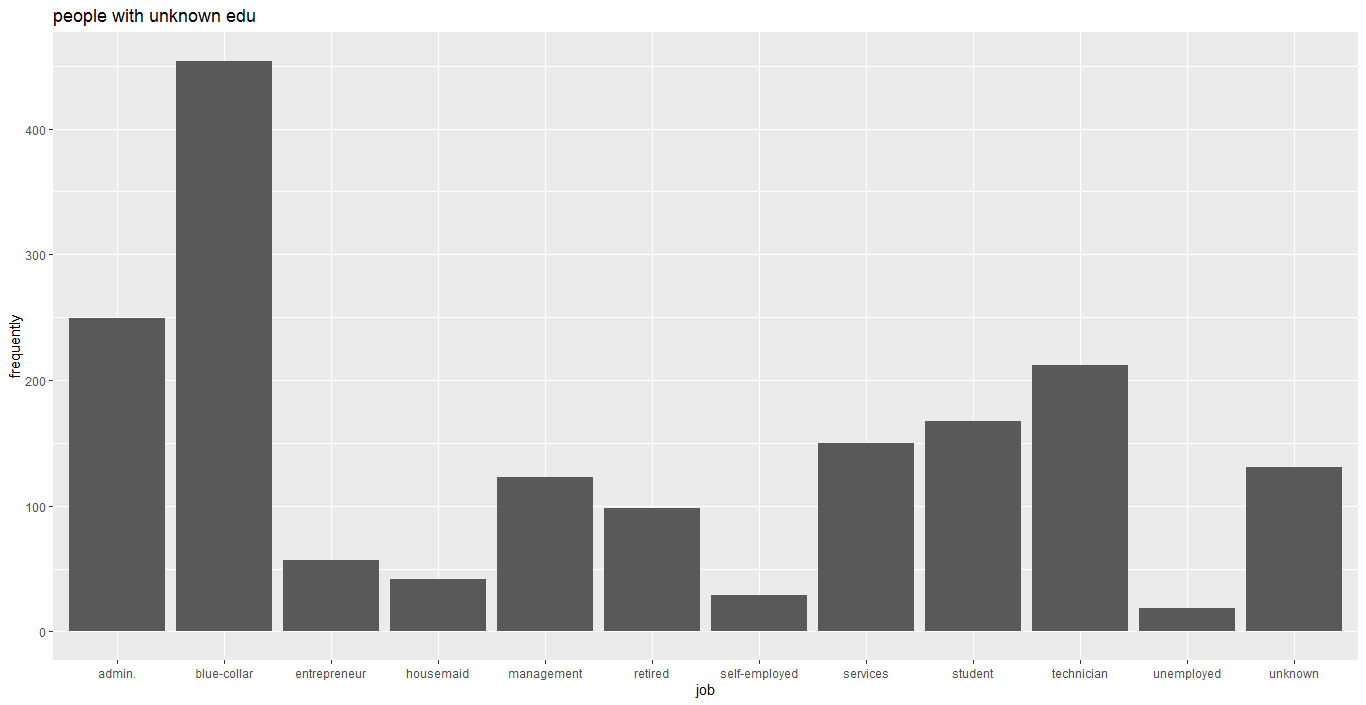

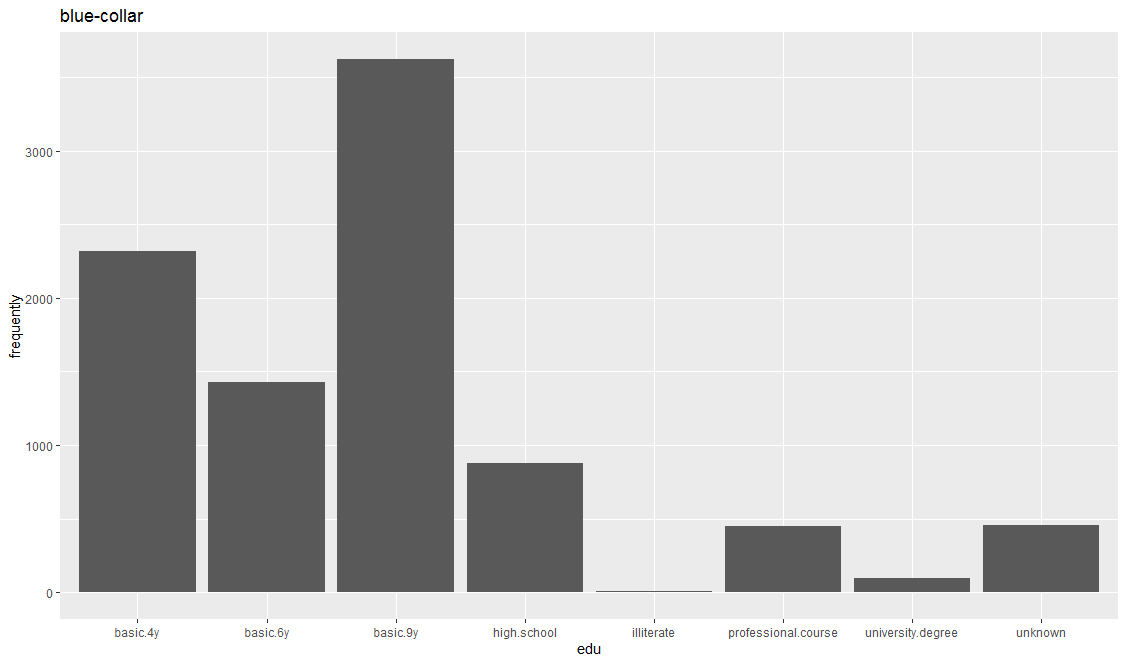

In [33]:
df[df['education']=='unknown'].shape

(1731, 34)

In [34]:
#for i,j in zip(df['education'],df['job']):
 #  if i == 'unknown'and j== 'blue-collar':
  #  i= 'basic.4y'

In [35]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'blue-collar':
        df['education'][i]= 'basic.6y'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [36]:
df[df['education']=='unknown'].shape

(1277, 34)

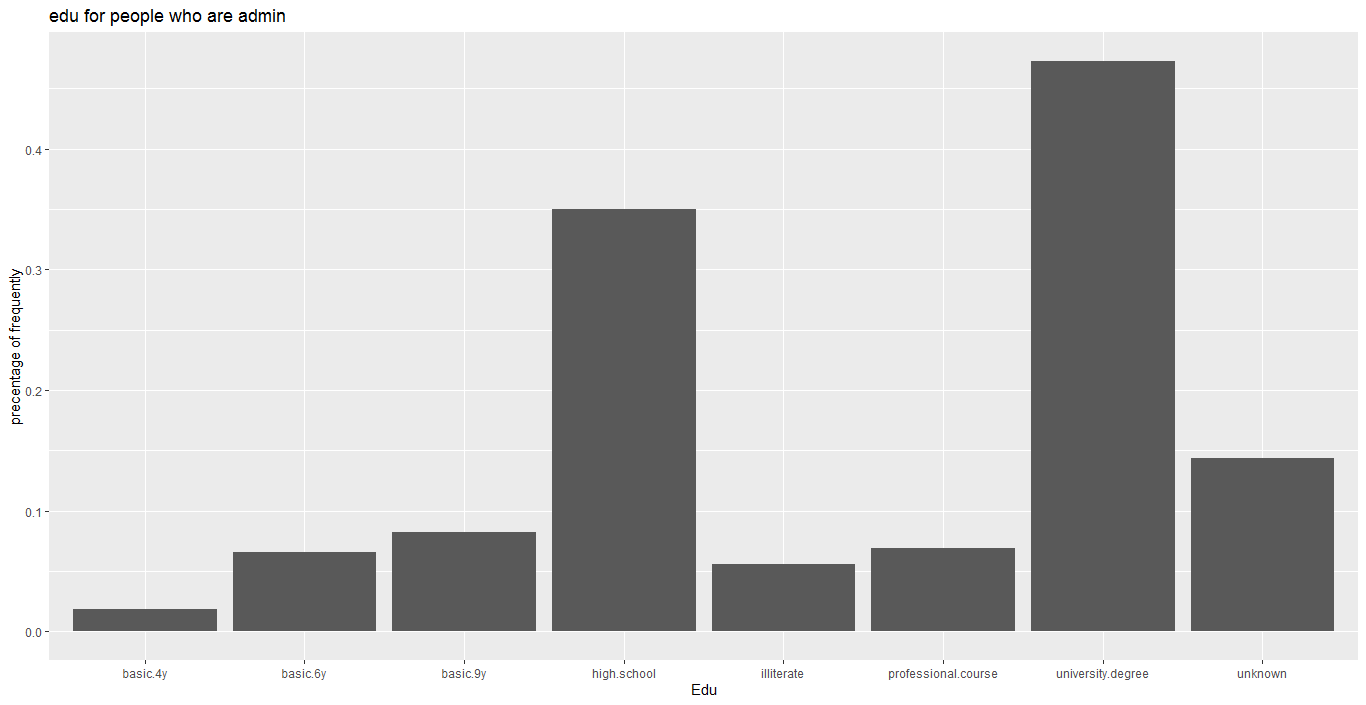

## So we consider all unknown edu people that are admin as university.degree

In [37]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'admin.':
        df['education'][i]= 'university.degree'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
df[df['education']=='unknown'].shape

(1028, 34)

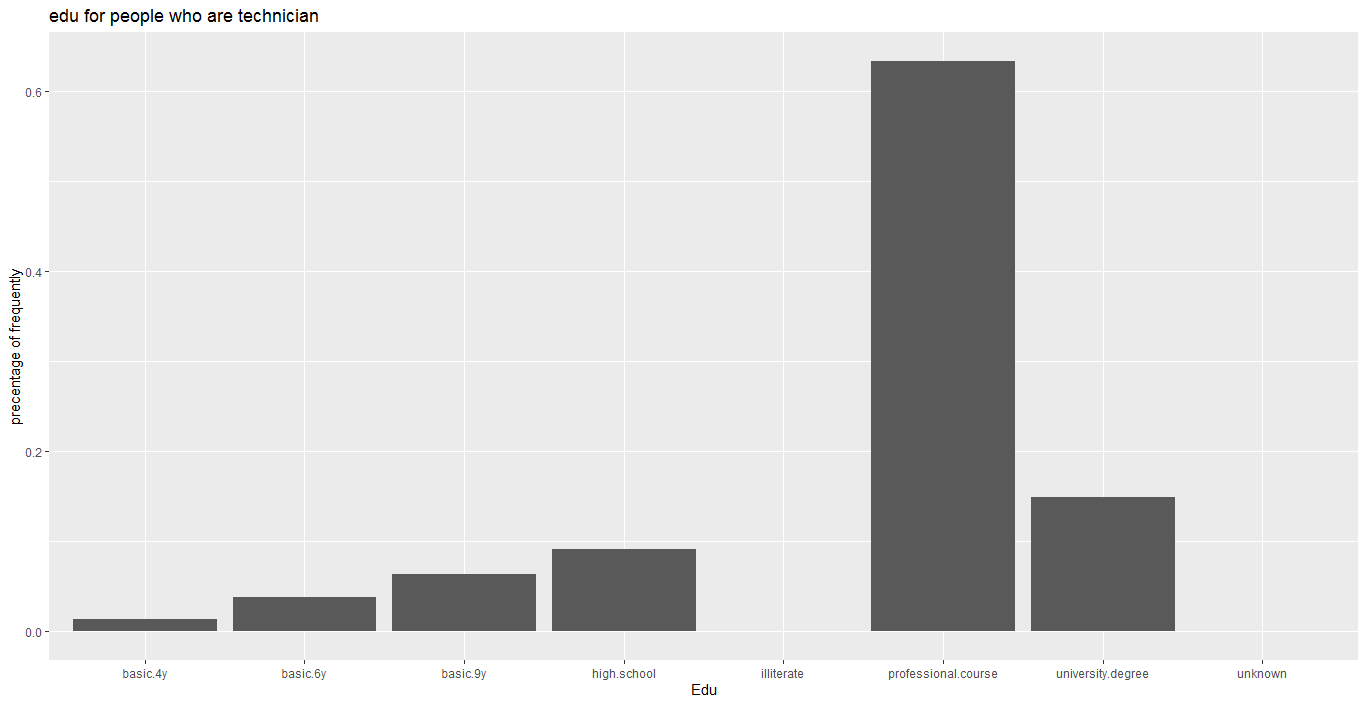

## So we consider all unknown edu people that are technician as professional.course

In [39]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'technician':
        df['education'][i]= 'professional.course'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
df[df['education']=='unknown'].shape

(816, 34)

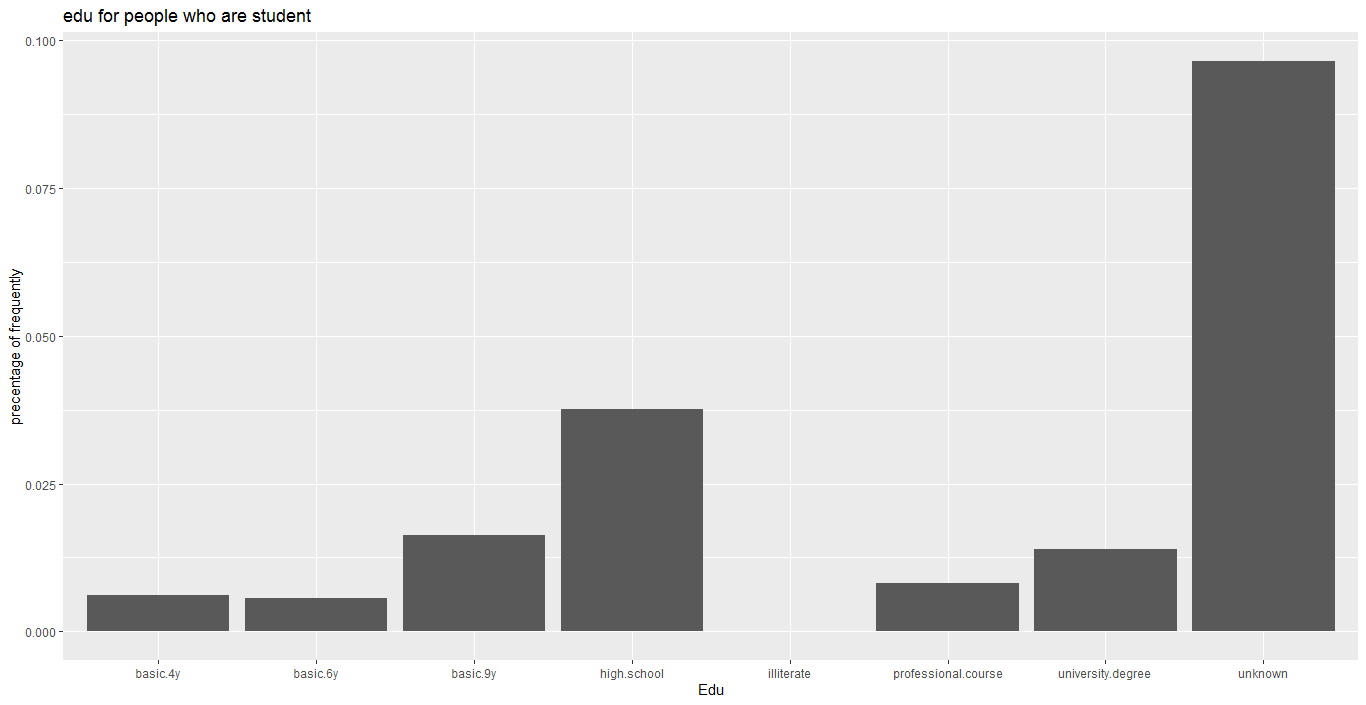

## So we consider all unknown edu people that are student as high.school

In [41]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'student':
        df['education'][i]= 'high.school'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
df[df['education']=='unknown'].shape

(649, 34)

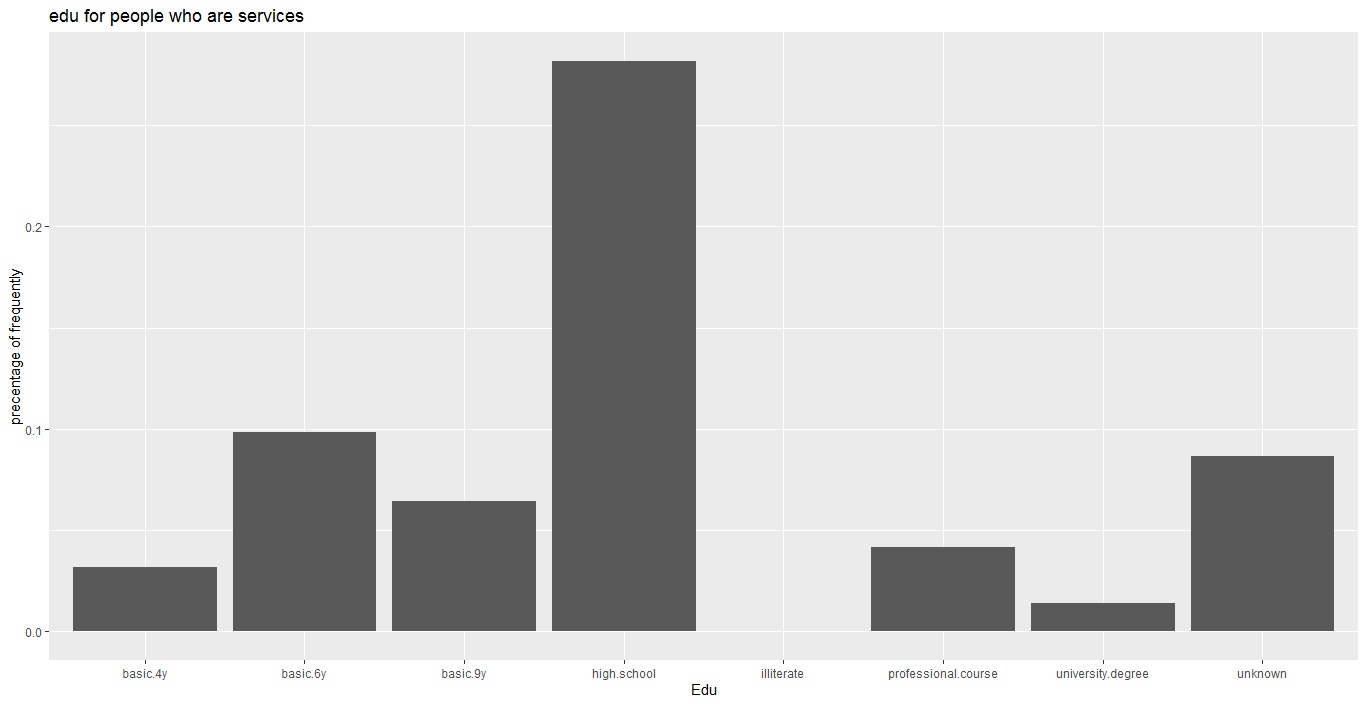

## So we consider all unknown edu people that are services as high.school too

In [43]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'services':
        df['education'][i]= 'high.school'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
df[df['education']=='unknown'].shape

(499, 34)

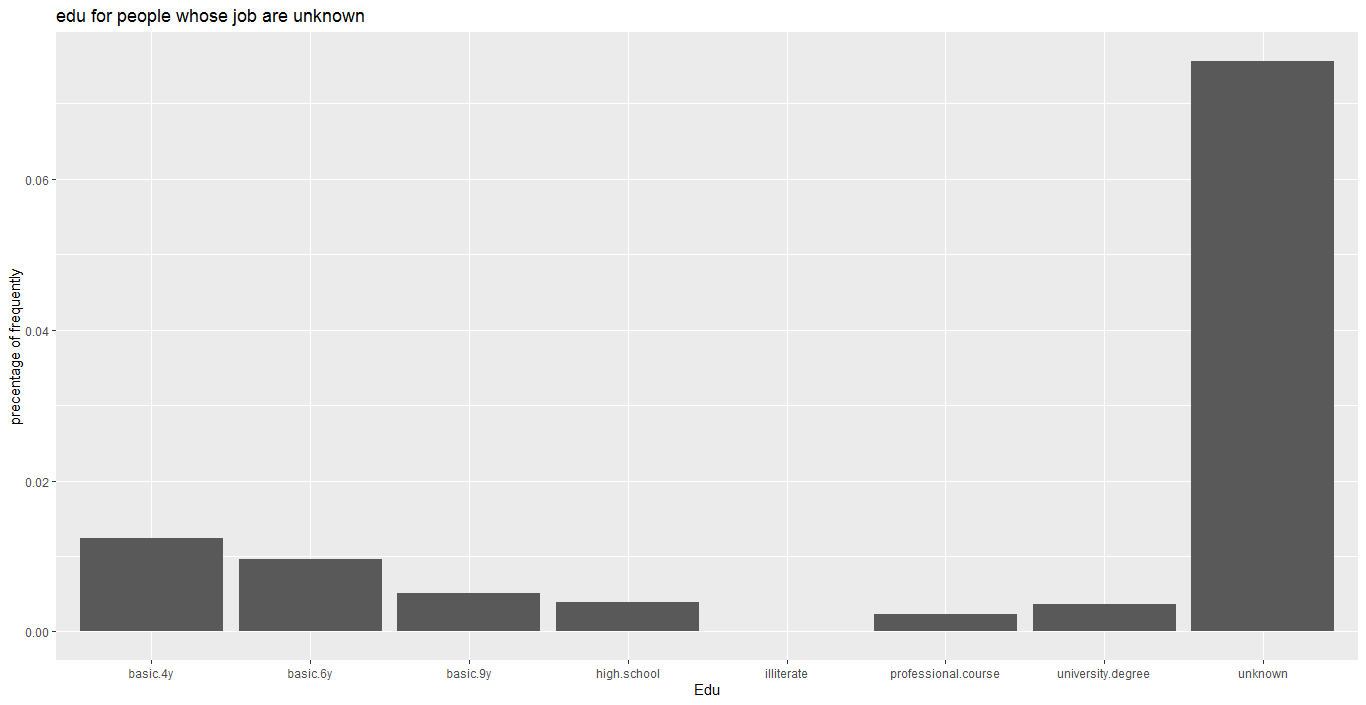

## So we consider all unknown edu people that their job is unknown too as basic.4y

In [45]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'unknown':
        df['education'][i]= 'basic.4y'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
df[df['education']=='unknown'].shape

(368, 34)

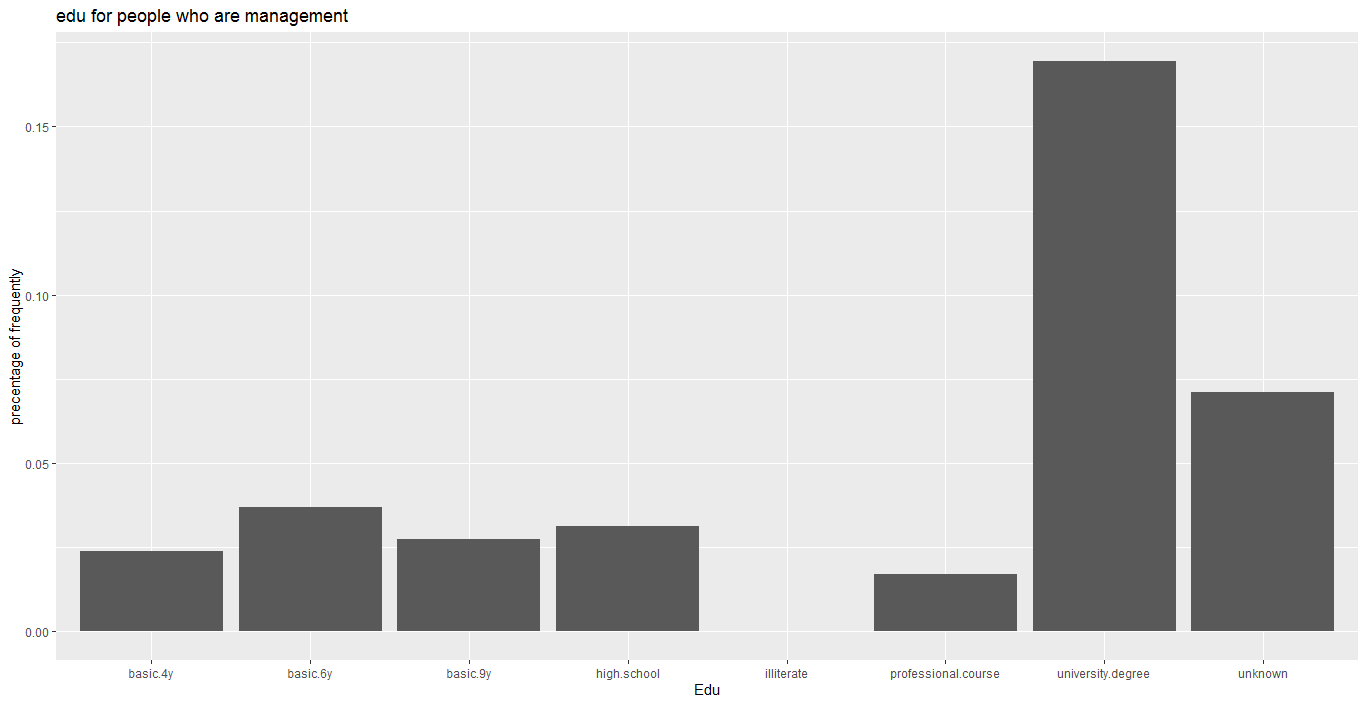

## So we consider all unknown edu people that their job is management as university.degree

In [47]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'management':
        df['education'][i]= 'university.degree'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
df[df['education']=='unknown'].shape

(245, 34)

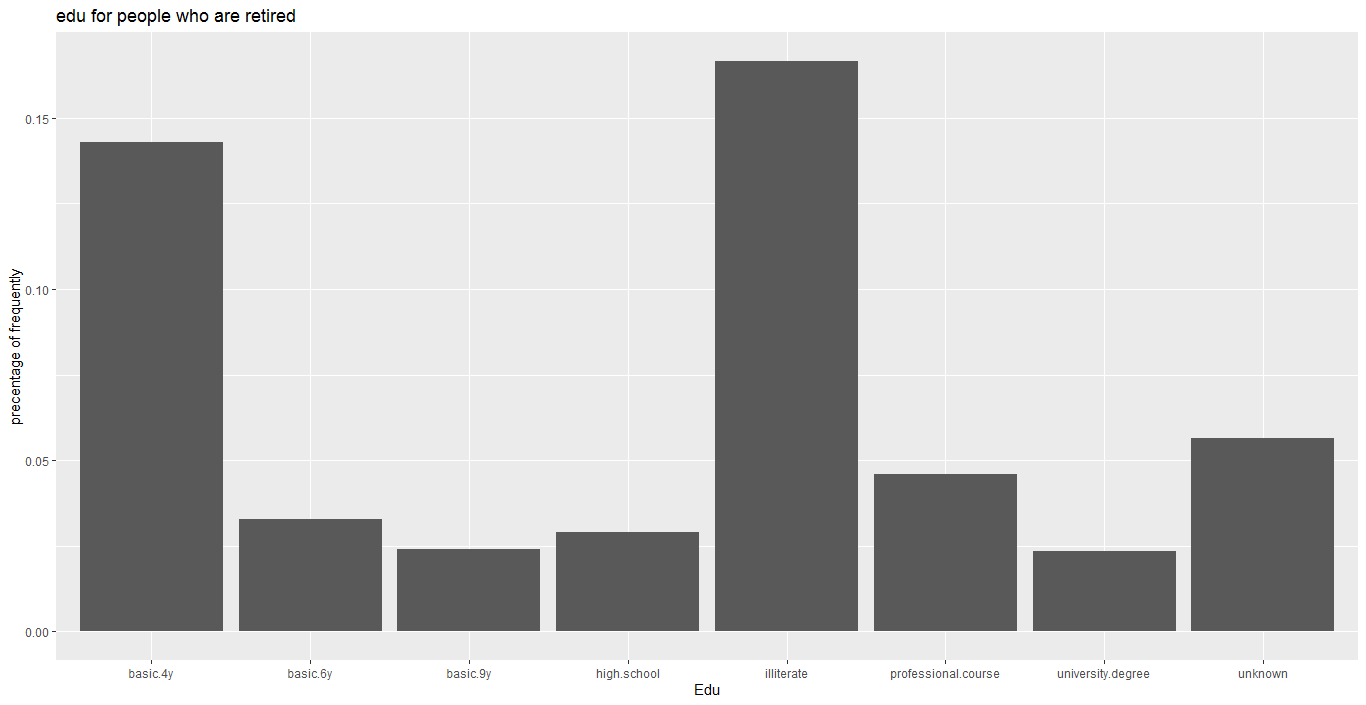

## So we consider all unknown edu people that are retired as basic.4y

In [49]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'retired':
        df['education'][i]= 'basic.4y'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df[df['education']=='unknown'].shape

(147, 34)

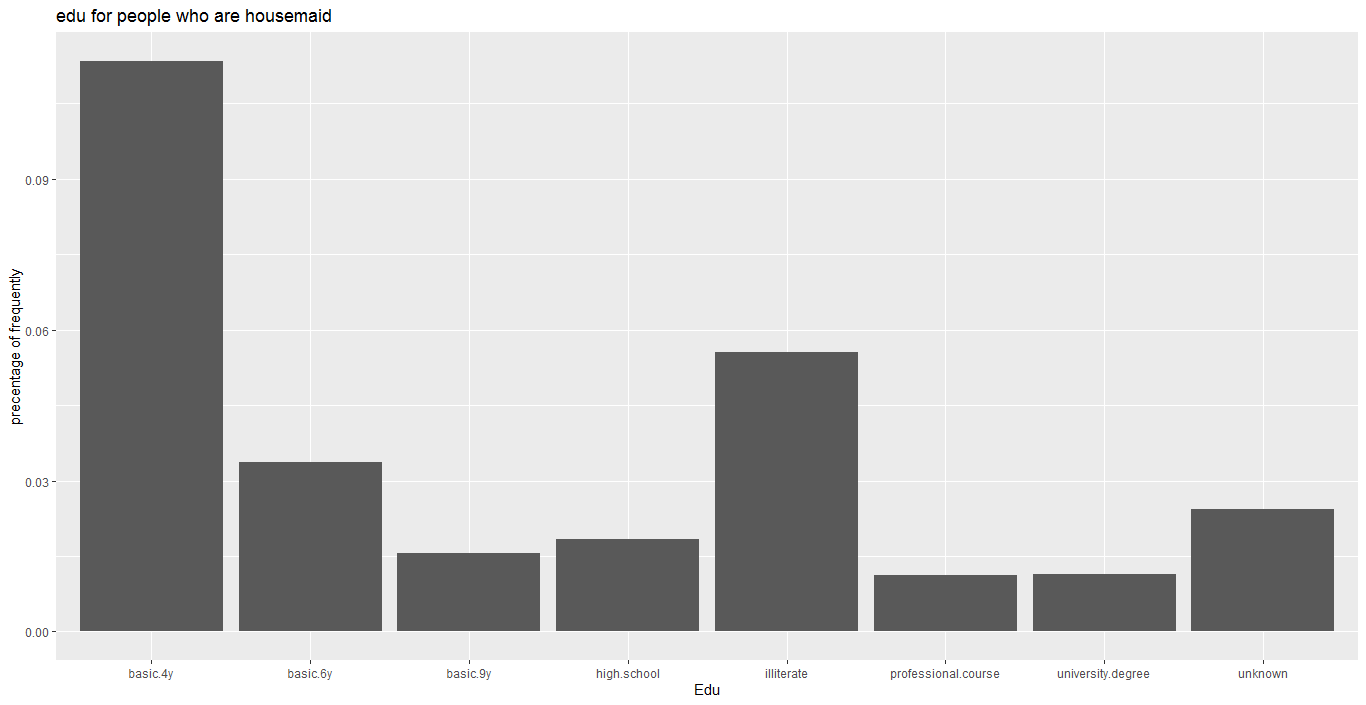

## So we consider all unknown edu people that are housemaid as basic.4y

In [51]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'housemaid':
        df['education'][i]= 'basic.4y'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
df[df['education']=='unknown'].shape

(105, 34)

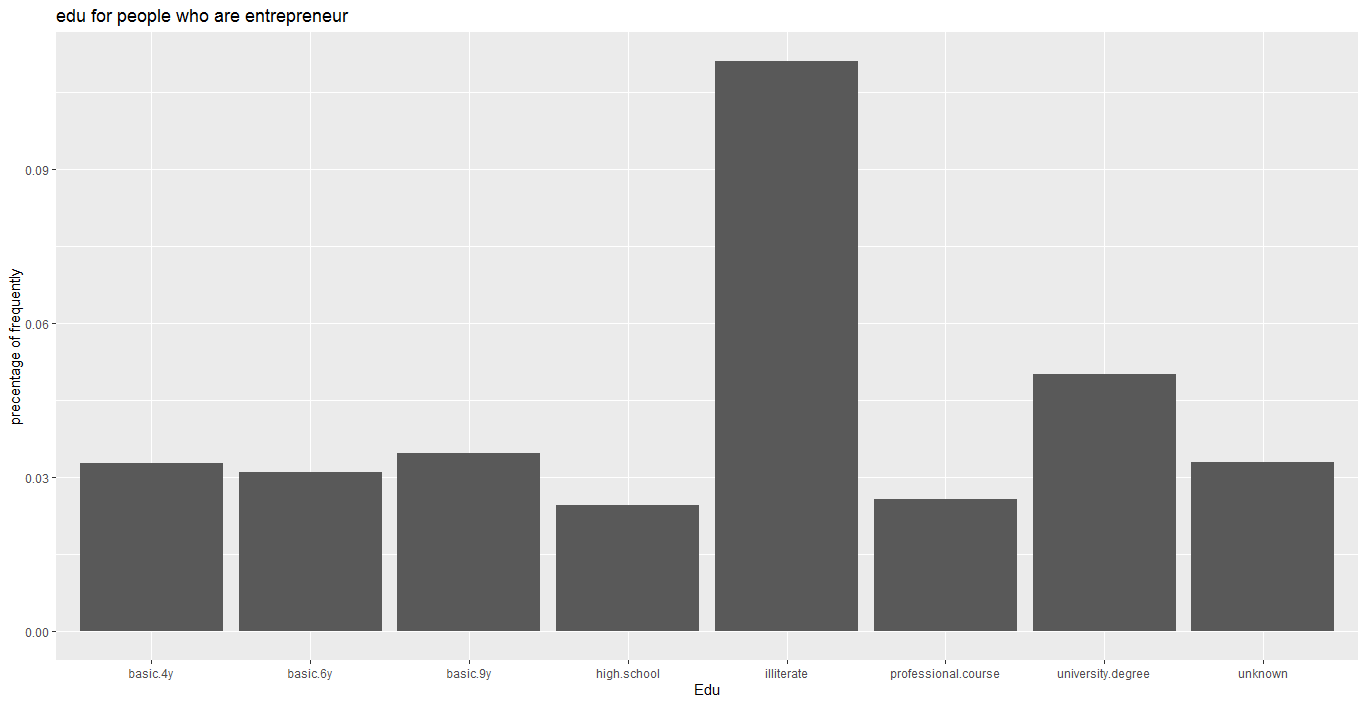

## So we consider all unknown edu people that are entrepreneur as university.degree

In [53]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'entrepreneur':
        df['education'][i]= 'university.degree'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [54]:
df[df['education']=='unknown'].shape

(48, 34)

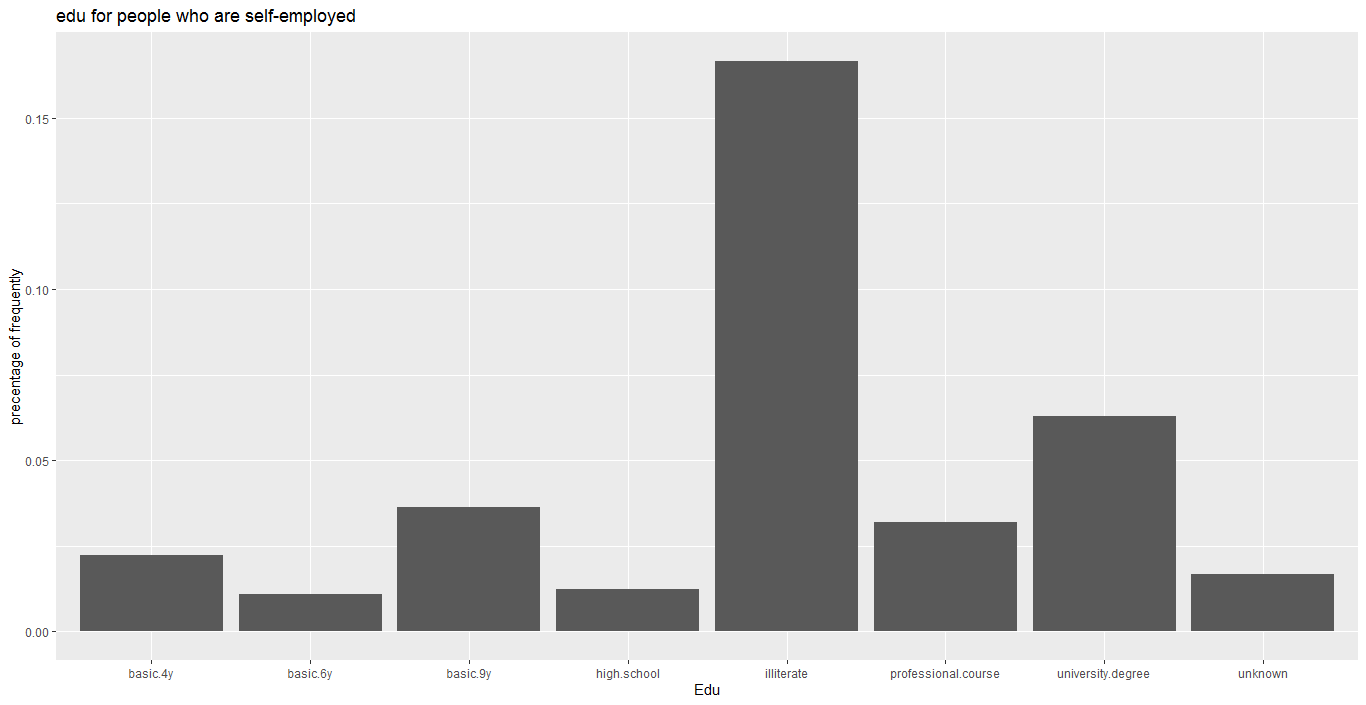

## So we consider all unknown edu people that are self-emplyed as university.degree

In [55]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'self-employed':
        df['education'][i]= 'university.degree'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
df[df['education']=='unknown'].shape

(19, 34)

In [57]:
for i in range(41188):
    if df['education'][i] == 'unknown' and df['job'][i]== 'unemployed':
        df['education'][i]= 'university.degree'


F:\anacondaa\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
df[df['education']=='unknown'].shape

(0, 34)

In [59]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [60]:
dummy_edu= pd.get_dummies(df['education'], drop_first=True)

In [61]:
df= pd.concat([df, dummy_edu], axis=1)

In [62]:
dummy_edu_tree= pd.get_dummies(df_tree['education'], drop_first=True)

In [63]:
df_tree= pd.concat([df_tree, dummy_edu], axis=1)
#df_tree= pd.concat([df_tree, dummy_edu_tree], axis=1)

## Default variable
### has credit in default?

In [64]:
df['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [65]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

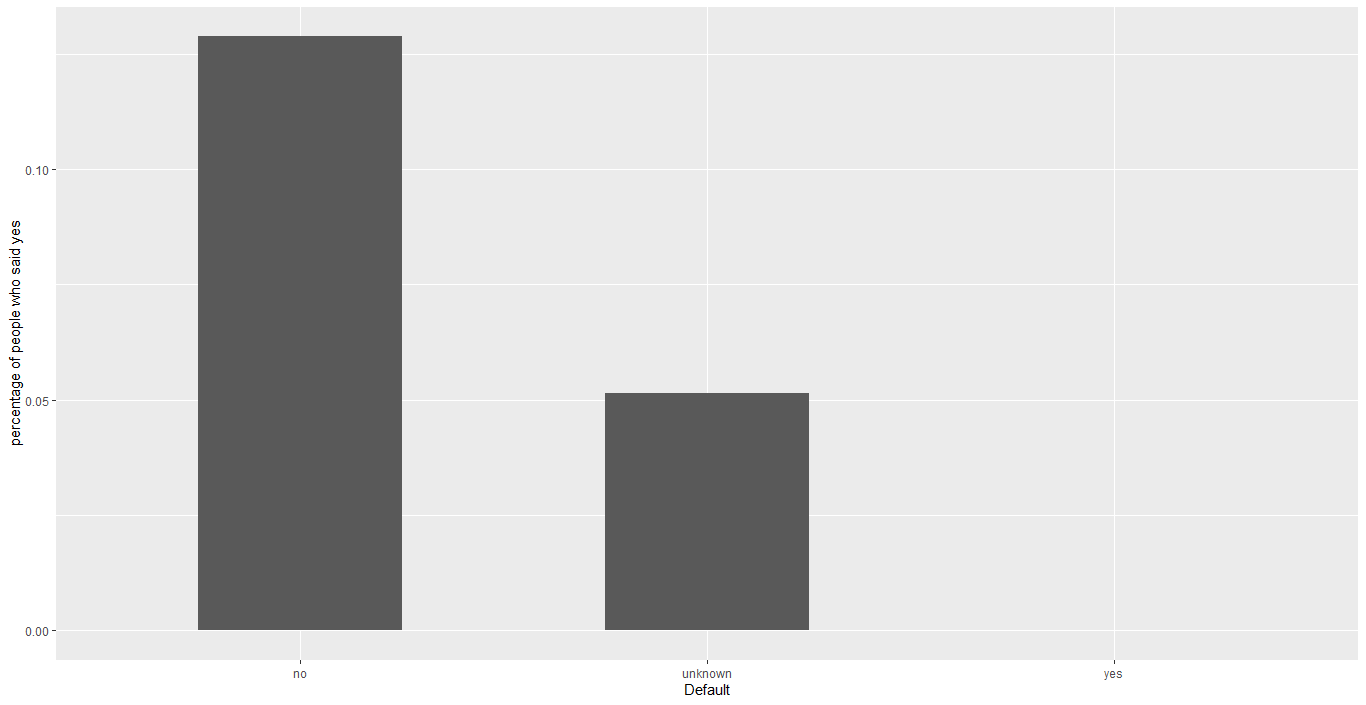

### Because yes in defaul variable is very rare We combine it with unknown for dimension reduction and avoiding over fiting

In [66]:
df.loc[df['default'] == 'unknown', 'default'] = 'unknown-yes'
df.loc[(df['default'] == 'yes'), 'default'] = 'unknown-yes'

In [67]:
#for i in range(41188):
#    if df['default'][i] == 'unknown' or df['default'][i]== 'yes':
#        df['default'][i]= 'unknown-yes'


In [68]:
dummy_default= pd.get_dummies(df['default'], drop_first=True)

In [69]:
df= pd.concat([df, dummy_default], axis=1)

In [70]:
dummy_default_tree= pd.get_dummies(df_tree['default'], drop_first=True)

In [71]:
df_tree= pd.concat([df_tree, dummy_default_tree], axis=1)

## Housing variable
### has housing loan? 

In [72]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

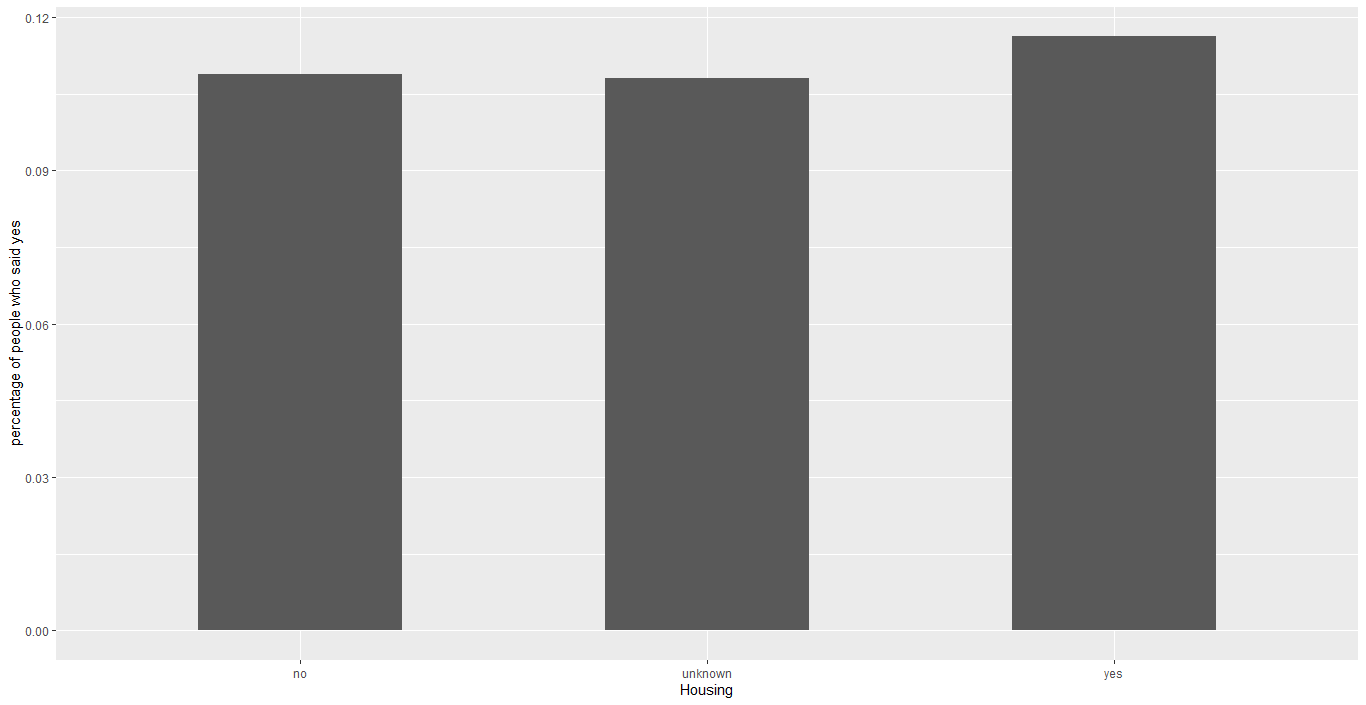

### It seems that this feature is not so much usable
### So maybe later we drope it

## Loan variable
### has personal loan?

In [73]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

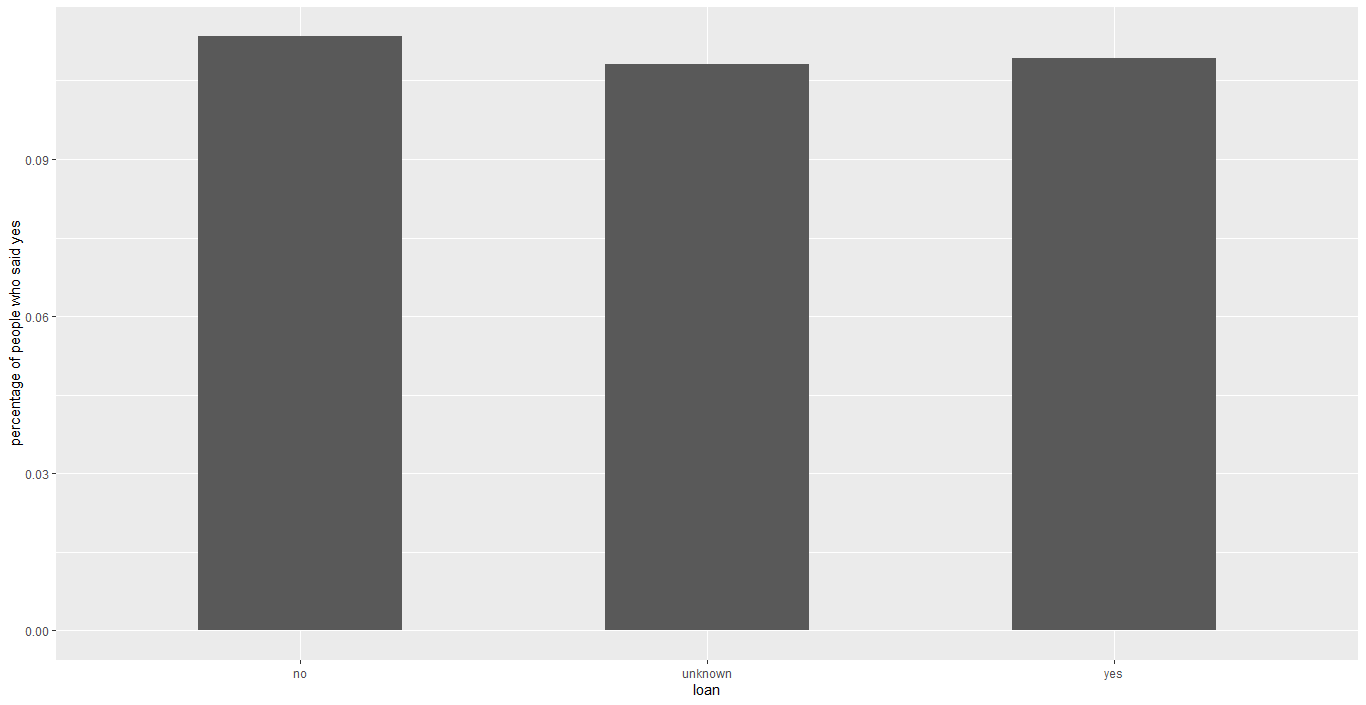

### it seems that loan is not a good predictor neither
### So maybe later we drope it

## contact variable
### contact communication type 

In [74]:
df['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

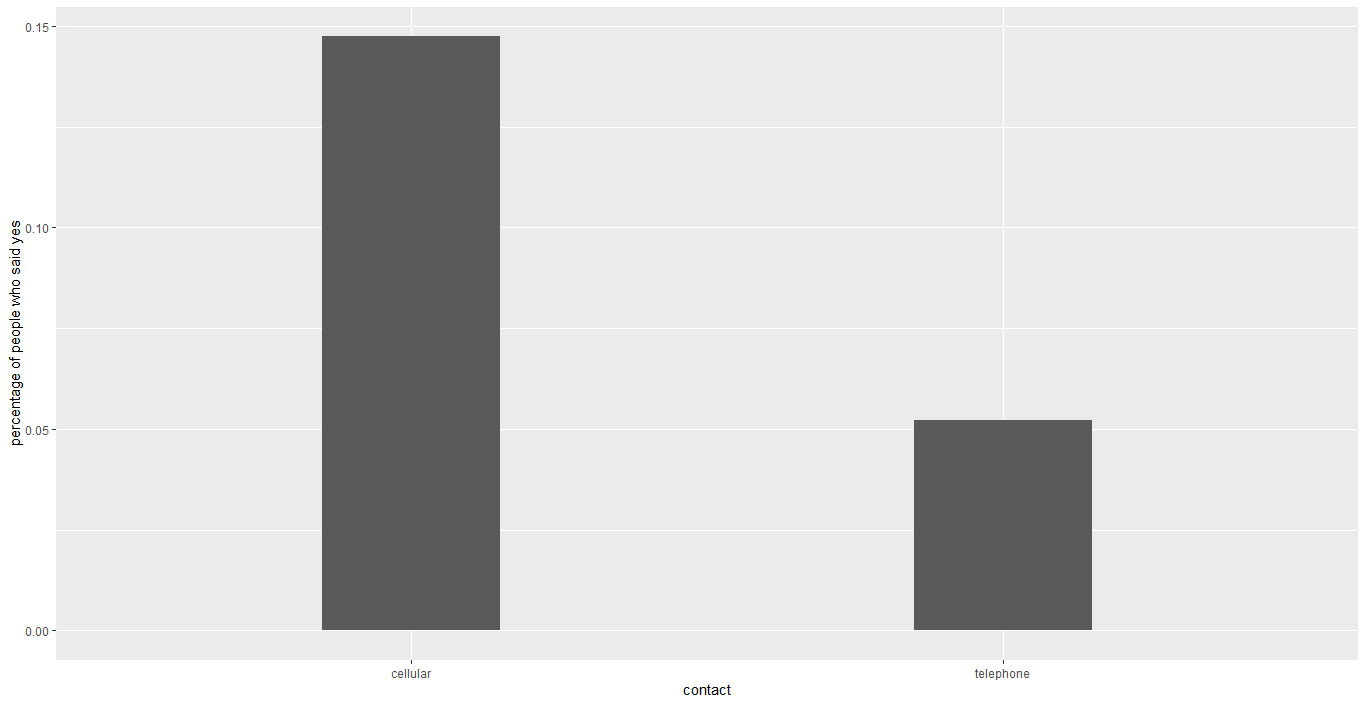

### contact shuld be a very effective variable

In [75]:
dummy_contact = pd.get_dummies(df['contact'], drop_first=True)

In [76]:
df= pd.concat([df, dummy_contact], axis=1)

In [77]:
df_tree= pd.concat([df_tree, dummy_contact], axis=1)

## Month variable
### last contact month of year 

In [78]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

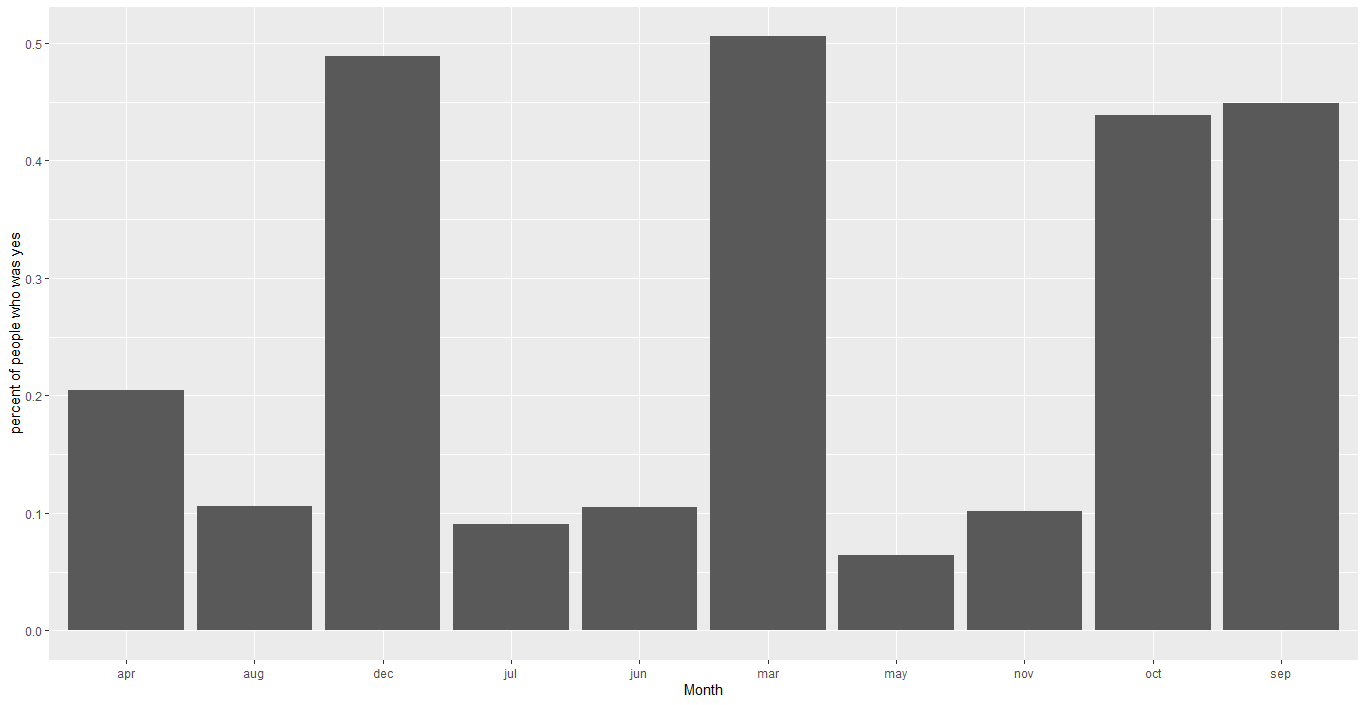

### به نظر می رسد در ماه هایی که تعداد آخرین تماس هایمان کمتر بوده، احتمال شرکت کردن در کمپین بیشتر است

### It seem months which has less frequently had a better chance too say yes to camapaign

In [79]:
dummy_month= pd.get_dummies(df['month'], drop_first=True)

In [80]:
df= pd.concat([df, dummy_month], axis=1)

In [81]:
df_tree= pd.concat([df_tree, dummy_month], axis=1)

## Day_of_week
### last contact day of the week 

In [82]:
df['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

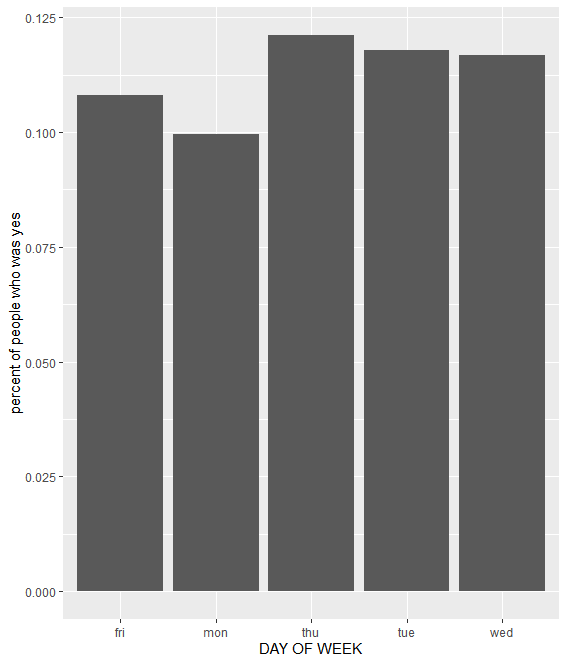

### it seems tha loan is not a good predictor
### So maybe later we drope it

## Campaign variable
### number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [83]:
np.sort(df['campaign'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 37, 39, 40, 41, 42, 43, 56], dtype=int64)

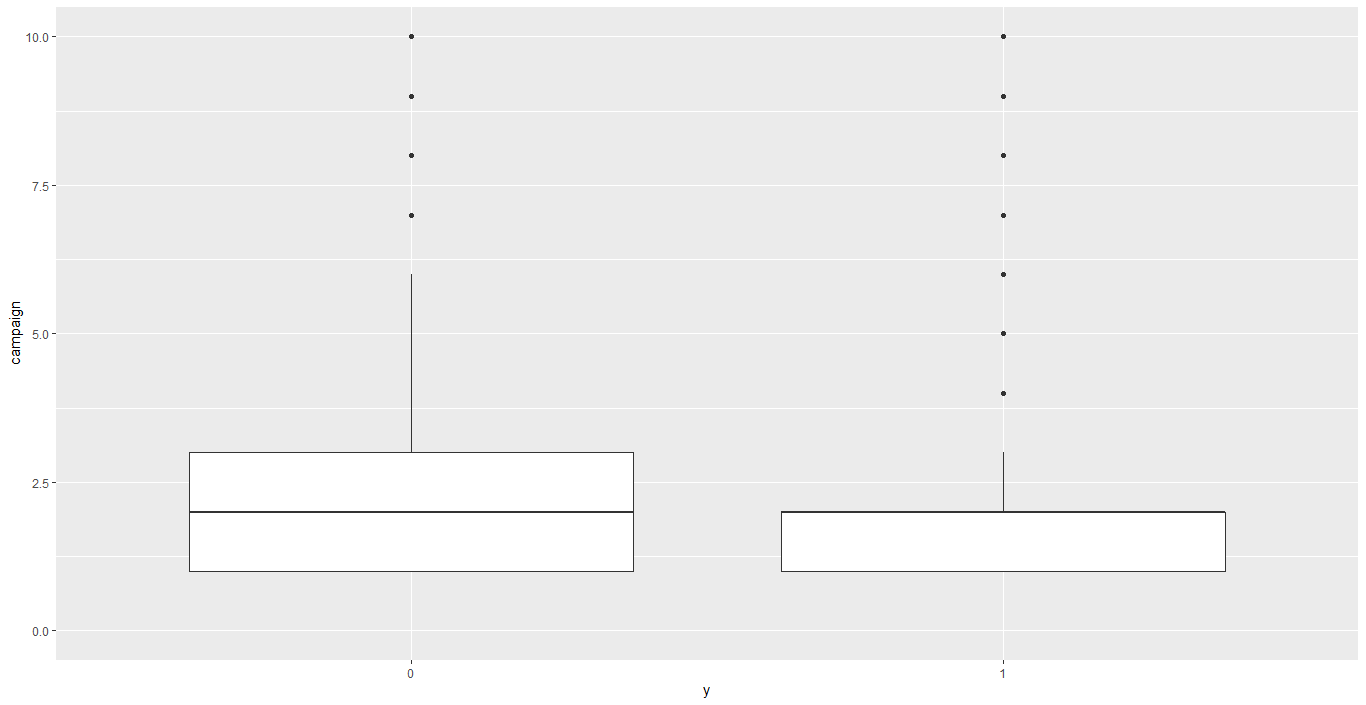

In [84]:
df['campaign']= (df['campaign']-df['campaign'].mean())/(df['campaign'].max()-df['campaign'].min())

### opposite of what we think people who did not said yes to campeign had been in more campeingns before

## Pdays variable
### number of days that passed by after the client was last contacted from a previous campaign 

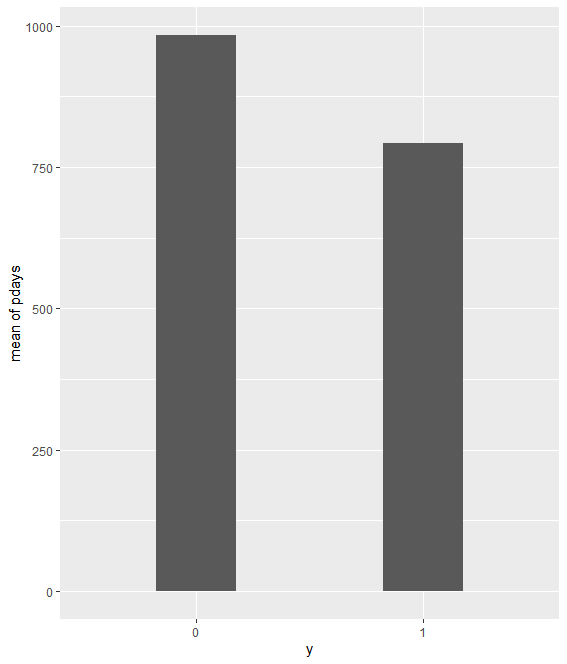

### mean of pdays of people who said yes is less

In [85]:
df['pdays']= (df['pdays']-df['pdays'].mean())/(df['pdays'].max()-df['pdays'].min())

## previous variable
### number of contacts performed before this campaign and for this client 

In [86]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [87]:
df.loc[df['previous']== 4, 'previous'] = 4.5
df.loc[df['previous'] == 5, 'previous'] = 4.5
df.loc[df['previous'] == 6, 'previous'] = 4.5
df.loc[df['previous'] == 7, 'previous'] = 4.5

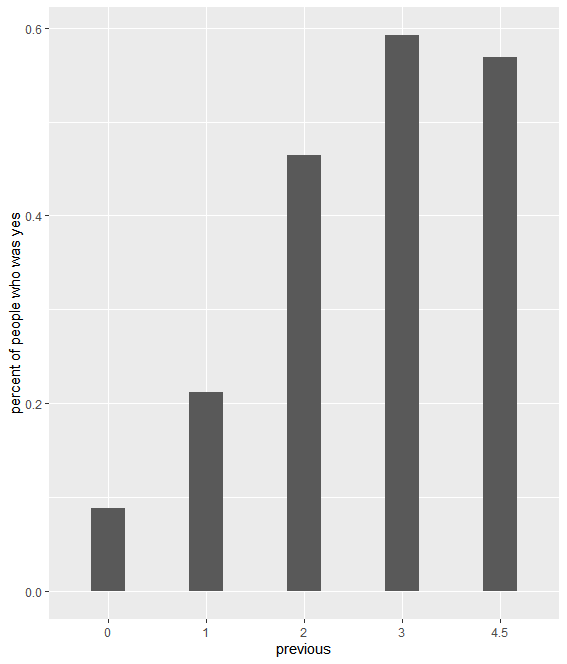

### It should be a good predictor

In [88]:
df['previous']= (df['previous']-df['previous'].mean())/(df['previous'].max()-df['previous'].min())

## 	Poutcome variable
### outcome of the previous marketing campaign 

In [89]:
df['poutcome'].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

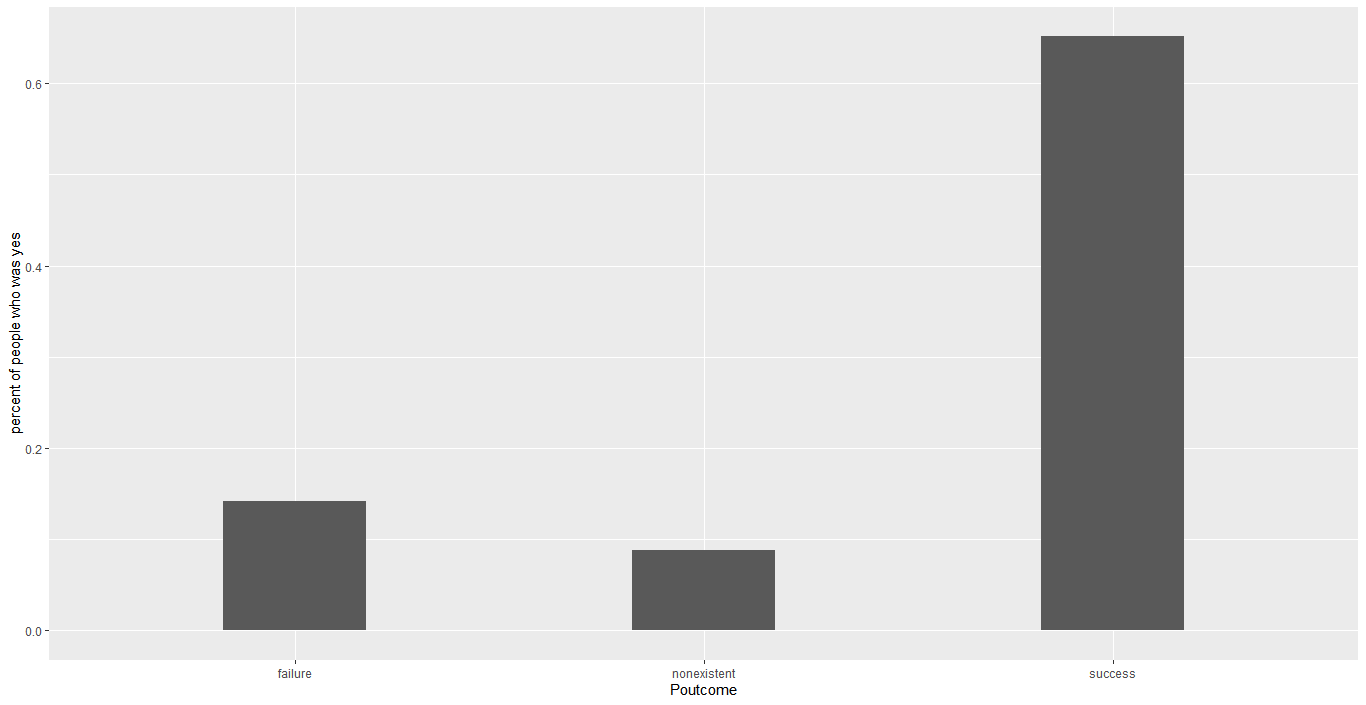

### It should be a great predictor, 
### It is cool that probality of say yes too campeign for people who this campeign is their first campeign in this bank is less than people which their last camepign failed.

In [90]:
dummy_pout = pd.get_dummies(df['poutcome'], drop_first= True)

In [91]:
df= pd.concat([df, dummy_pout], axis=1)

In [92]:
dummy_pout_tree = pd.get_dummies(df_tree['poutcome'], drop_first= True)

In [93]:
df_tree= pd.concat([df_tree, dummy_pout_tree], axis=1)

## Emp.var.rate variable
### employment variation rate - quarterly indicator 

In [94]:
df['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

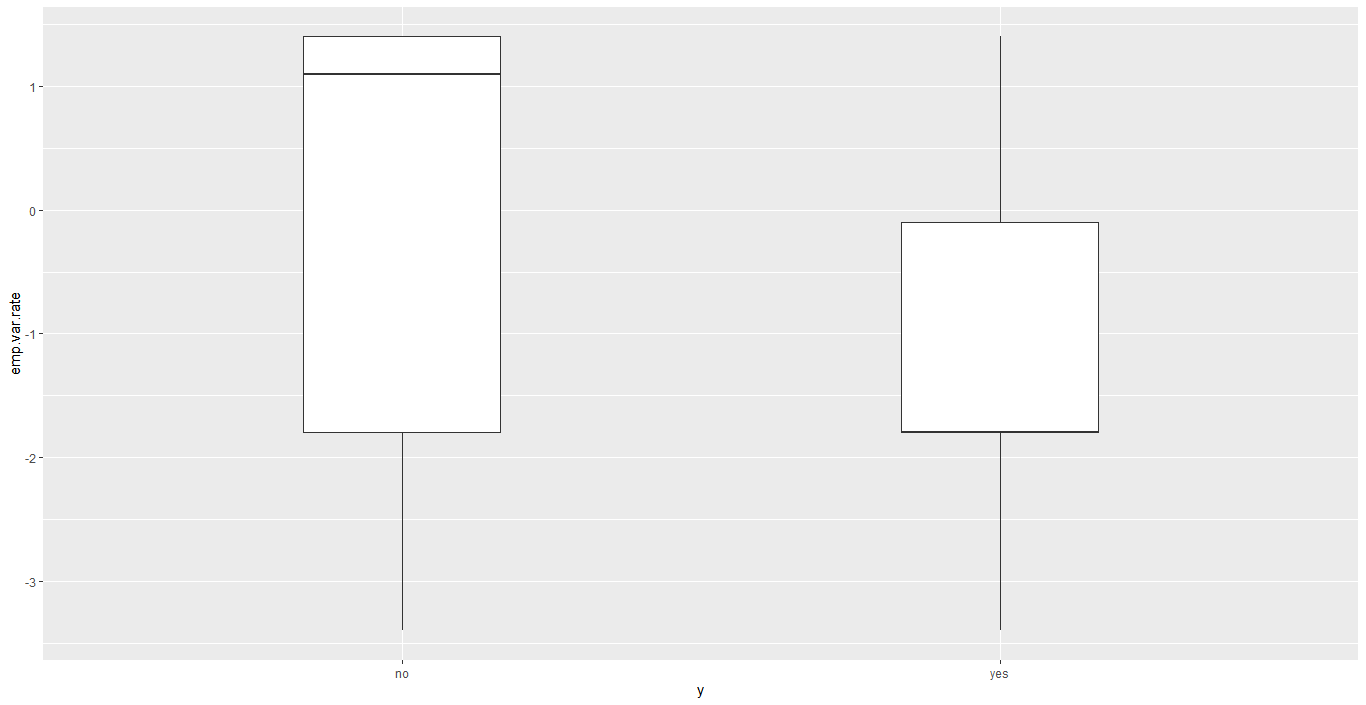

### people who said yes to the campaign usually has less emp.var.rate

In [95]:
df['emp.var.rate']= (df['emp.var.rate']-df['emp.var.rate'].mean())/(df['emp.var.rate'].max()-df['emp.var.rate'].min())

## Cons.price.idx
### consumer price index - monthly indicator 

In [96]:
df['cons.price.idx'].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

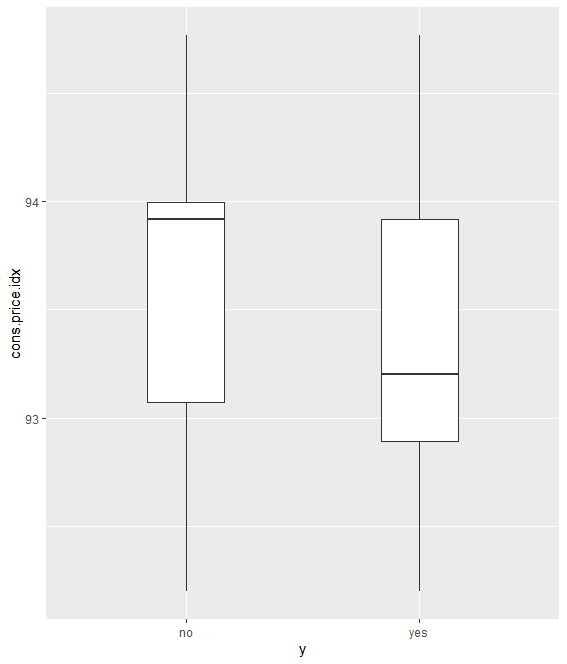

### So here we can see that median in people who said yes is lower

In [97]:
df['cons.price.idx']= (df['cons.price.idx']-df['cons.price.idx'].mean())/(df['cons.price.idx'].max()-df['cons.price.idx'].min())

## Cons.conf.idx 
### consumer confidence index - monthly indicator (numeric)

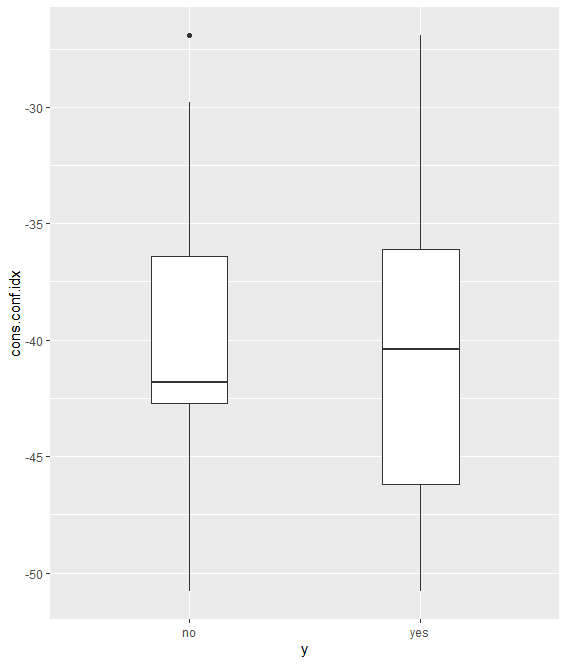

### So here we can see that median in people who said yes is upper

In [98]:
df['cons.conf.idx']= (df['cons.conf.idx']-df['cons.conf.idx'].mean())/(df['cons.conf.idx'].max()-df['cons.conf.idx'].min())

## Euribor3m
### euribor 3 month rate - daily indicator (numeric)

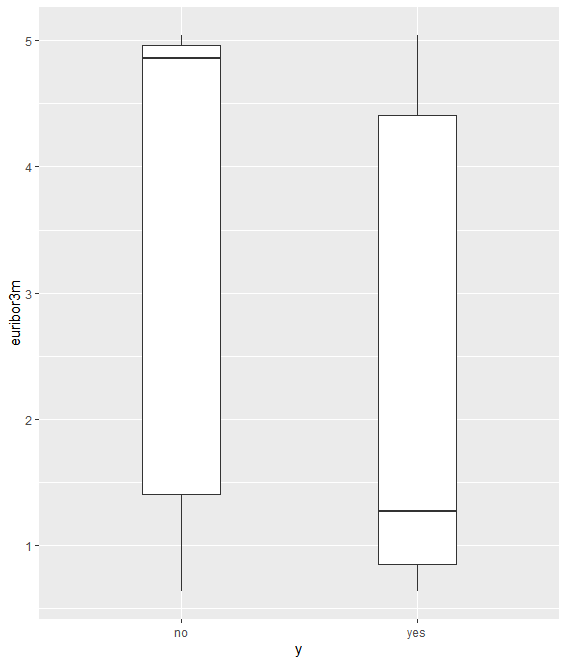

### So here we can see that median in people who said yes is very lower so it should be a very good predictor

In [99]:
df['euribor3m']= (df['euribor3m']-df['euribor3m'].mean())/(df['euribor3m'].max()-df['euribor3m'].min())

## Nr.employed
### number of employees - quarterly indicator (numeric)

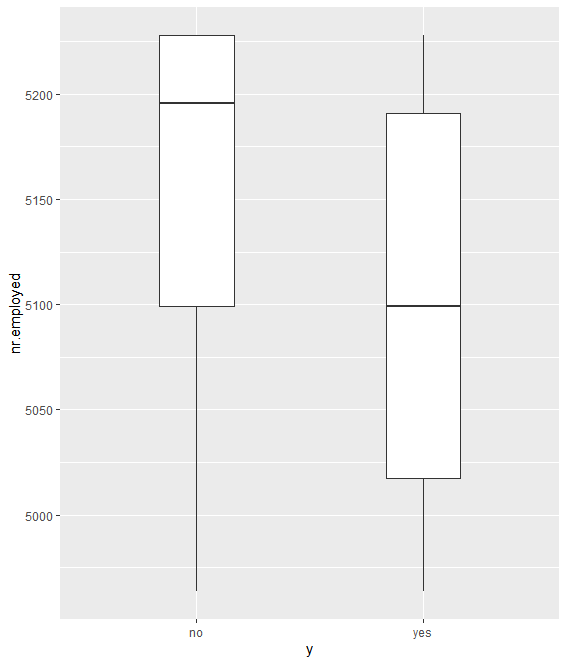

## Heat Map: Visualizing Correlation

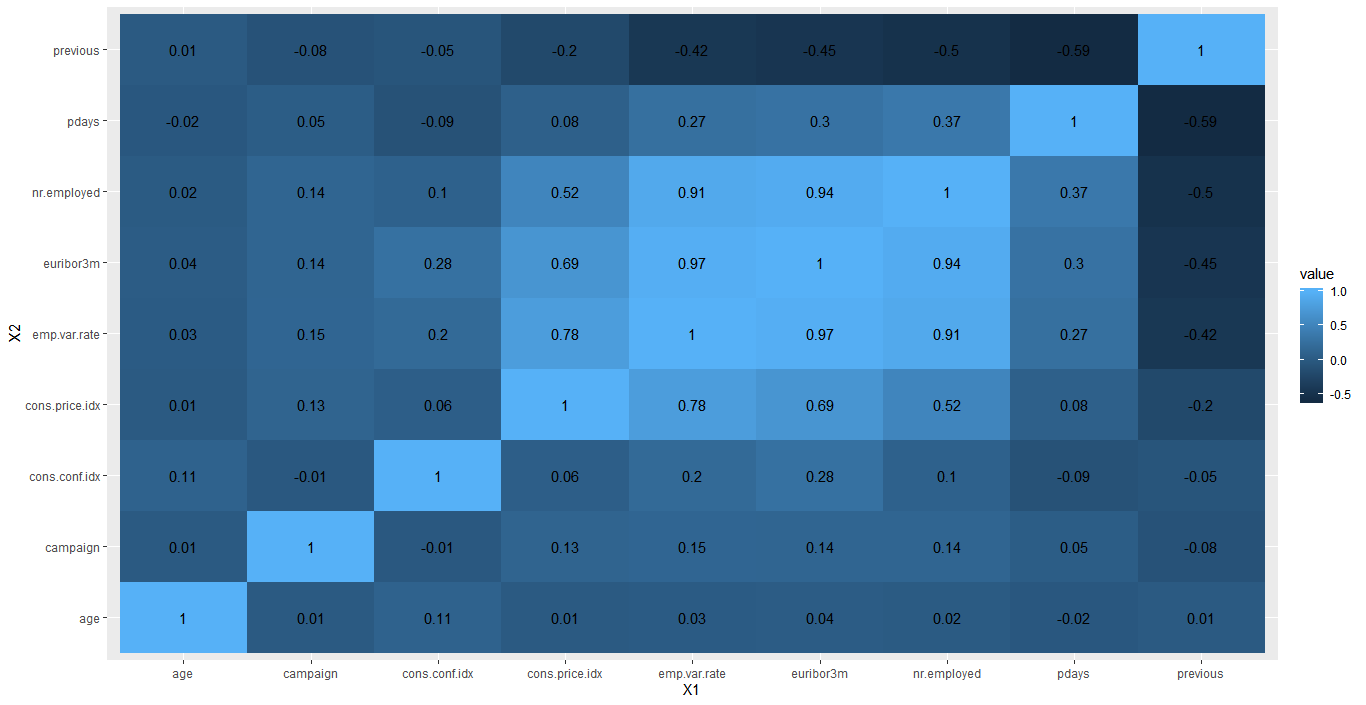

## Variables with high correlation are very bad and we should do some thing about them
## according to heat map 3 variables: Nr.employed, Euribor3m, Emp.var.rate two by two has more than .90 correlation 
### We can choose one of them and remove the rest, according to plots we choosed Nr.employed

# now we drop columns that seems useless or we made them dummy:


In [100]:
df.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome', 'contact', 'month',
                 'day_of_week', 'euribor3m', 'emp.var.rate'], inplace= True)


### We removed duration variable because: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [101]:
df.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,blue-collar,...,dec,jul,jun,mar,may,nov,oct,sep,nonexistent,success
0,0.589942,261,-0.028502,0.036561,-0.038523,0.16303,0.171657,5191.0,no,0,...,0,0,0,0,1,0,0,0,1,0
1,0.589942,149,-0.028502,0.036561,-0.038523,0.16303,0.171657,5191.0,no,0,...,0,0,0,0,1,0,0,0,1,0
2,-0.090910,226,-0.028502,0.036561,-0.038523,0.16303,0.171657,5191.0,no,0,...,0,0,0,0,1,0,0,0,1,0
3,-0.090910,151,-0.028502,0.036561,-0.038523,0.16303,0.171657,5191.0,no,0,...,0,0,0,0,1,0,0,0,1,0
4,0.589942,307,-0.028502,0.036561,-0.038523,0.16303,0.171657,5191.0,no,0,...,0,0,0,0,1,0,0,0,1,0


# Y variable

In [102]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

# Split data to train and test set

In [103]:
from sklearn.model_selection import train_test_split

In [104]:
df_x = df.drop(columns= 'y')
df_y = df['y']

In [105]:
print(df_x.shape)
df_y.shape

(41188, 40)


(41188,)

In [106]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.1, random_state=42)

## So Our Naive Benchmark Is:

In [107]:
(df[df['y']== 'no'].shape[0])/df.shape[0]

0.8873458288821987

### It is accuracy when we consider all out comes as no it seem nice too us but here our Recall for 'yes' would be 0 that is too bad. and We know that predicting people who would say yes is more important

# Some predictive Models:

## 1: Logestic regression

In [108]:
df_log = pd.DataFrame.copy(df)
df_log['just.one'] = 1
df_log_x = df_log.drop(columns= 'y')
df_log_y = df_log['y']
from sklearn.model_selection import train_test_split
x_log_train, x_log_test, y_log_train, y_log_test= train_test_split(df_log_x, df_log_y, test_size=0.1, random_state=42)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [110]:
classifyer_logestic = LogisticRegression(solver='liblinear',
                                        multi_class='auto').fit(x_log_train, y_log_train)

In [111]:
classifyer_logestic.coef_


array([[ 5.14274715e-02,  4.40815789e-03, -2.08600881e-01,
        -1.23192838e+00,  3.78244619e-01, -1.11902051e+00,
         6.61125501e-01, -7.53072954e-04, -2.98552547e-01,
        -2.09955366e-01, -5.78242920e-02, -1.30520248e-01,
         6.99073912e-01, -2.07931944e-01, -2.14722809e-01,
         6.20638447e-01, -9.44523626e-02,  1.84692210e-01,
         4.01345413e-02,  1.22155708e-01,  2.76057268e-01,
        -4.00820011e-02, -9.40331225e-02, -3.38007825e-02,
         2.53102161e-02,  2.66992071e-02,  1.24753410e-01,
        -6.62249621e-01, -9.74911796e-01, -9.49761094e-01,
         2.62650285e-01, -7.29505367e-01,  3.05165139e-01,
         1.38713125e+00, -8.89100836e-01, -9.62979384e-01,
         7.79537152e-01,  5.35641643e-01,  1.20039593e-01,
         1.12424130e+00,  3.44173466e-01]])

### these coef some how shows the importance of variables

### 1.1: train set accuracy

In [112]:
classifyer_logestic.score(x_log_train, y_log_train)

0.9067145053818555

In [113]:
#without 1: 0.9056893900563814

In [114]:
#0.9067145053818555

### 1.2: test set accuracy

In [115]:
classifyer_logestic.score(x_log_test, y_log_test)

0.9089584850691915

In [116]:
# 0.9089584850691915

### 1.3: Confusion matrix and classification-report for training set

In [117]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_predict_log = classifyer_logestic.predict(x_log_train)
print(confusion_matrix(y_log_train, y_train_predict_log))

[[32078   813]
 [ 2645  1533]]


#### 32811 'no' and we predicte them as 'no' True
#### 80 'no' and we predicte them as 'yes' False
#### 3979 'yes' and we predicte them as 'no' False
#### 199 'yes' and we predicte them as 'yes' True

In [118]:
#Recall for yes
199/(3979+199)

0.047630445189085685

In [119]:
#recal for no
32811/(32811+80)

0.9975677236934116

In [120]:
print(classification_report(y_log_train,y_train_predict_log))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     32891
         yes       0.65      0.37      0.47      4178

   micro avg       0.91      0.91      0.91     37069
   macro avg       0.79      0.67      0.71     37069
weighted avg       0.89      0.91      0.89     37069



In [121]:
# Recall for no .98 and recall for yes .37

### 1.4: Confusion matrix and classification-report for test set

In [122]:
from sklearn.metrics import confusion_matrix
y_test_predict_log = classifyer_logestic.predict(x_log_test)
confusion_matrix(y_log_test, y_test_predict_log)

array([[3563,   94],
       [ 281,  181]], dtype=int64)

#### 3563 'no' and we predicte them as 'no' True
#### 94 'no' and we predicte them as 'yes' False
#### 281 'yes' and we predicte them as 'no' False
#### 181 'yes' and we predicte them as 'yes' True

In [123]:
print(classification_report(y_log_test,y_test_predict_log))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      3657
         yes       0.66      0.39      0.49       462

   micro avg       0.91      0.91      0.91      4119
   macro avg       0.79      0.68      0.72      4119
weighted avg       0.90      0.91      0.90      4119



In [124]:
# Recall for no .97 and recall for yes .39

## 2: Decision tree

In [125]:
df_tree.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome', 'contact', 'month',
                 'day_of_week', 'euribor3m', 'emp.var.rate'], inplace= True)

# Split data to train and test set

In [126]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 42 columns):
age                    41188 non-null int64
duration               41188 non-null int64
campaign               41188 non-null int64
pdays                  41188 non-null int64
previous               41188 non-null int64
cons.price.idx         41188 non-null float64
cons.conf.idx          41188 non-null float64
nr.employed            41188 non-null float64
y                      41188 non-null object
blue-collar            41188 non-null uint8
entrepreneur           41188 non-null uint8
housemaid              41188 non-null uint8
management             41188 non-null uint8
retired                41188 non-null uint8
self-employed          41188 non-null uint8
services               41188 non-null uint8
student                41188 non-null uint8
technician             41188 non-null uint8
unemployed             41188 non-null uint8
unknown                41188 non-null uint8
marr

In [127]:
df_tree_x = df_tree.drop(columns= 'y')
df_tree_y = df_tree['y']

In [128]:
x_tree_train, x_tree_test, y_tree_train, y_tree_test= train_test_split(df_tree_x, df_tree_y, test_size=0.1, random_state=42)

In [129]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 100, random_state= 1)
#classifier_decision_tree.fit(x_tree_train, y_tree_train)

In [130]:
classifier_decision_tree.fit(x_tree_train, y_tree_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [131]:
#from sklearn.tree import DecisionTreeClassifier
#classifier_decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 200, max_depth= 5)
#classifier_decision_tree.fit(x_train, y_train)

### 2.1: train set accuracy

In [132]:
classifier_decision_tree.score(x_tree_train, y_tree_train)

0.9278102997113491

In [133]:
#0.9277293695540748

### 2.2: test set accuracy

In [134]:
classifier_decision_tree.score(x_tree_test, y_tree_test)

0.9067734887108522

In [135]:
#0.9067734887108522

### 2.3: Confusion matrix and  classification-report for training set

In [136]:
from sklearn.metrics import confusion_matrix
y_train_predict_tree = classifier_decision_tree.predict(x_tree_train)
confusion_matrix(y_tree_train, y_train_predict_tree)

array([[31915,   976],
       [ 1700,  2478]], dtype=int64)

#### 31915 'no' and we predicte them as 'no' True
#### 976 'no' and we predicte them as 'yes' False
#### 1700 'yes' and we predicte them as 'no' False
#### 2478 'yes' and we predicte them as 'yes' True

In [137]:
print(classification_report(y_train,y_train_predict_tree))

              precision    recall  f1-score   support

          no       0.95      0.97      0.96     32891
         yes       0.72      0.59      0.65      4178

   micro avg       0.93      0.93      0.93     37069
   macro avg       0.83      0.78      0.80     37069
weighted avg       0.92      0.93      0.92     37069



In [138]:
# Recall for no .97 and recall for yes .59

### 2.4: Confusion matrix and classification-report for test set

In [139]:
from sklearn.metrics import confusion_matrix
y_test_predict_tree = classifier_decision_tree.predict(x_tree_test)
confusion_matrix(y_tree_test, y_test_predict_tree)

array([[3499,  158],
       [ 226,  236]], dtype=int64)

#### 3499 'no' and we predicte them as 'no' True
#### 158 'no' and we predicte them as 'yes' False
#### 226 'yes' and we predicte them as 'no' False
#### 236 'yes' and we predicte them as 'yes' True

In [140]:
print(classification_report(y_test,y_test_predict_tree))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      3657
         yes       0.60      0.51      0.55       462

   micro avg       0.91      0.91      0.91      4119
   macro avg       0.77      0.73      0.75      4119
weighted avg       0.90      0.91      0.90      4119



In [141]:
# Recall for no .96 and recall for yes .51

In [142]:
classifier_decision_tree.feature_importances_ 

array([3.85778514e-02, 4.82138088e-01, 9.74823127e-03, 4.45056466e-02,
       5.04839004e-03, 1.60226291e-02, 3.43707953e-02, 3.01113721e-01,
       1.09854361e-03, 4.41319904e-04, 1.64902743e-03, 1.37708772e-03,
       1.48513847e-03, 3.98409928e-04, 7.67779014e-04, 9.75979411e-04,
       3.40873430e-03, 1.47401035e-03, 1.07539180e-03, 1.12648418e-03,
       2.35689285e-04, 3.03070814e-04, 2.24748537e-03, 1.44056266e-03,
       2.78977550e-04, 2.40224470e-03, 4.74060813e-03, 2.98584604e-03,
       0.00000000e+00, 4.93024522e-03, 8.92535372e-04, 4.33249907e-04,
       2.86974648e-04, 1.65649383e-04, 1.09793443e-02, 3.68871012e-03,
       2.92917560e-03, 1.14902459e-02, 0.00000000e+00, 1.15797014e-03,
       1.60815595e-03])

# 3: KNN

In [143]:
print(x_train.shape)
print(y_train.shape)
print(y_train[y_train=='yes'].shape)

(37069, 40)
(37069,)
(4178,)


In [144]:
a=np.sort( y_train[y_train=='yes'].index)

In [145]:
y_train1= y_train[y_train=='yes']

In [146]:
x_train1= x_train.loc[a]

In [147]:
x_train1.shape

(4178, 40)

In [148]:
x_train.shape

(37069, 40)

In [149]:
a1=np.sort( y_test[y_test=='yes'].index)

In [150]:
y_test1= y_test[y_test=='yes']

In [151]:
x_test1= x_test.loc[a1]

In [152]:
x_test1.shape

(462, 40)

In [153]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    classifier_knn = KNeighborsClassifier(n_neighbors = i)
    classifier_knn.fit(x_train, y_train)
    print("trainset recall yes for %i neighbor(s) is:  %0.10f"%(i,classifier_knn.score(x_train1, y_train1)))
    print("testset recall yes for %i neighbor(s) is:  %0.10f"%(i, classifier_knn.score(x_test1, y_test1)))

trainset recall yes for 1 neighbor(s) is:  0.9988032551
testset recall yes for 1 neighbor(s) is:  0.4502164502
trainset recall yes for 2 neighbor(s) is:  0.4868358066
testset recall yes for 2 neighbor(s) is:  0.2619047619
trainset recall yes for 3 neighbor(s) is:  0.6756821446
testset recall yes for 3 neighbor(s) is:  0.4307359307
trainset recall yes for 4 neighbor(s) is:  0.4739109622
testset recall yes for 4 neighbor(s) is:  0.3138528139
trainset recall yes for 5 neighbor(s) is:  0.6002872188
testset recall yes for 5 neighbor(s) is:  0.4242424242
trainset recall yes for 6 neighbor(s) is:  0.4669698420
testset recall yes for 6 neighbor(s) is:  0.3333333333
trainset recall yes for 7 neighbor(s) is:  0.5682144567
testset recall yes for 7 neighbor(s) is:  0.4264069264
trainset recall yes for 8 neighbor(s) is:  0.4746290091
testset recall yes for 8 neighbor(s) is:  0.3593073593
trainset recall yes for 9 neighbor(s) is:  0.5481091431
testset recall yes for 9 neighbor(s) is:  0.4458874459
t

In [154]:
for i in range(15, 35):
    classifier_knn = KNeighborsClassifier(n_neighbors = i)
    classifier_knn.fit(x_train, y_train)
    print("trainset recall yes for %i neighbor(s) is:  %0.10f"%(i,classifier_knn.score(x_train1, y_train1)))
    print("testset for recall yes %i neighbor(s) is:  %0.10f"%(i, classifier_knn.score(x_test1, y_test1)))

trainset recall yes for 15 neighbor(s) is:  0.5272857827
testset for recall yes 15 neighbor(s) is:  0.4523809524
trainset recall yes for 16 neighbor(s) is:  0.4777405457
testset for recall yes 16 neighbor(s) is:  0.4069264069
trainset recall yes for 17 neighbor(s) is:  0.5299186213
testset for recall yes 17 neighbor(s) is:  0.4610389610
trainset recall yes for 18 neighbor(s) is:  0.4899473432
testset for recall yes 18 neighbor(s) is:  0.4285714286
trainset recall yes for 19 neighbor(s) is:  0.5282431786
testset for recall yes 19 neighbor(s) is:  0.4783549784
trainset recall yes for 20 neighbor(s) is:  0.4913834371
testset for recall yes 20 neighbor(s) is:  0.4480519481
trainset recall yes for 21 neighbor(s) is:  0.5248922930
testset for recall yes 21 neighbor(s) is:  0.4826839827
trainset recall yes for 22 neighbor(s) is:  0.4897079943
testset for recall yes 22 neighbor(s) is:  0.4502164502
trainset recall yes for 23 neighbor(s) is:  0.5186692197
testset for recall yes 23 neighbor(s) i

In [155]:
#21: trainset for 21 neighbor(s) is:  0.5248922930
#    testset for 21 neighbor(s) is:  0.4826839827

In [156]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_21 = KNeighborsClassifier(n_neighbors = 21)
classifier_knn_21.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=21, p=2,
           weights='uniform')

### 3.1: train set accuracy

In [157]:
classifier_knn_21.score(x_train, y_train)

0.9145647306374599

In [158]:
#0.9145647306374599

### 3.2: test set accuracy

In [159]:
classifier_knn_21.score(x_test, y_test)

0.9055596018451081

In [160]:
#0.9055596018451081

### 3.3: Confusion matrix and  classification-report for training set

In [161]:
from sklearn.metrics import confusion_matrix
y_train_predict_knn_21 = classifier_knn_21.predict(x_train)
confusion_matrix(y_train, y_train_predict_knn_21)

array([[31709,  1182],
       [ 1985,  2193]], dtype=int64)

#### 31709 'no' and we predicte them as 'no' True
#### 1182 'no' and we predicte them as 'yes' False
#### 1985 'yes' and we predicte them as 'no' False
#### 2193 'yes' and we predicte them as 'yes' True

In [162]:
print(classification_report(y_train,y_train_predict_knn_21))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95     32891
         yes       0.65      0.52      0.58      4178

   micro avg       0.91      0.91      0.91     37069
   macro avg       0.80      0.74      0.77     37069
weighted avg       0.91      0.91      0.91     37069



In [163]:
# Recall for no .96 and recall for yes .52

### 3.4: Confusion matrix and classification-report for test set

In [164]:
from sklearn.metrics import confusion_matrix
y_test_predict_knn_21 = classifier_knn_21.predict(x_test)
confusion_matrix(y_test, y_test_predict_knn_21)

array([[3507,  150],
       [ 239,  223]], dtype=int64)

#### 3507 'no' and we predicte them as 'no' True
#### 150 'no' and we predicte them as 'yes' False
#### 239 'yes' and we predicte them as 'no' False
#### 223 'yes' and we predicte them as 'yes' True

In [165]:
print(classification_report(y_test,y_test_predict_knn_21))

              precision    recall  f1-score   support

          no       0.94      0.96      0.95      3657
         yes       0.60      0.48      0.53       462

   micro avg       0.91      0.91      0.91      4119
   macro avg       0.77      0.72      0.74      4119
weighted avg       0.90      0.91      0.90      4119



In [166]:
# Recall for no .96 and recall for yes .48

# 4: Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier
classifier_randomForest = RandomForestClassifier(n_estimators=500 , criterion = 'gini', min_samples_split= 20, random_state=1)

In [168]:
classifier_randomForest.fit(x_tree_train, y_tree_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [169]:
#from sklearn.ensemble import RandomForestClassifier
#classifier_randomForest = RandomForestClassifier(n_estimators=50, random_state=1)
#classifier_randomForest.fit(x_train, y_train)

### 4.1: train set accuracy

In [170]:
classifier_randomForest.score(x_tree_train, y_tree_train)

0.9497963257708597

In [171]:
#9497693490517684

In [172]:
#9503628368717797

### 4.2: test set accuracy

In [173]:
classifier_randomForest.score(x_tree_test, y_tree_test)


0.9135712551590192

In [174]:
#.8844379703811605

In [175]:
#0.9123573682932751

### 4.3: Confusion matrix and  classification-report for training set

In [176]:
from sklearn.metrics import confusion_matrix
y_train_predict_rf = classifier_randomForest.predict(x_tree_train)
confusion_matrix(y_tree_train, y_train_predict_rf)

array([[32421,   470],
       [ 1391,  2787]], dtype=int64)

#### 32421 'no' and we predicte them as 'no' True
#### 470 'no' and we predicte them as 'yes' False
#### 1391 'yes' and we predicte them as 'no' False
#### 2787 'yes' and we predicte them as 'yes' True

In [177]:
print(classification_report(y_train,y_train_predict_rf))

              precision    recall  f1-score   support

          no       0.96      0.99      0.97     32891
         yes       0.86      0.67      0.75      4178

   micro avg       0.95      0.95      0.95     37069
   macro avg       0.91      0.83      0.86     37069
weighted avg       0.95      0.95      0.95     37069



In [178]:
# Recall for no .99 and recall for yes .67

### 3.4: Confusion matrix and classification-report for test set

In [179]:
from sklearn.metrics import confusion_matrix
y_test_predict_rf = classifier_randomForest.predict(x_tree_test)
confusion_matrix(y_tree_test, y_test_predict_rf)

array([[3534,  123],
       [ 233,  229]], dtype=int64)

#### 3534 'no' and we predicte them as 'no' True
#### 123 'no' and we predicte them as 'yes' False
#### 233 'yes' and we predicte them as 'no' False
#### 229 'yes' and we predicte them as 'yes' True

In [180]:
print(classification_report(y_tree_test,y_test_predict_rf))

              precision    recall  f1-score   support

          no       0.94      0.97      0.95      3657
         yes       0.65      0.50      0.56       462

   micro avg       0.91      0.91      0.91      4119
   macro avg       0.79      0.73      0.76      4119
weighted avg       0.91      0.91      0.91      4119



In [181]:
# Recall for no .97 and recall for yes .50

# Calculate recall for yes without duration variable:

In [182]:
df.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'y', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'married', 'single',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown-yes', 'telephone',
       'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'nonexistent', 'success'],
      dtype='object')

In [183]:
df.drop(columns='duration', inplace= True)

In [184]:
df_log.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'y', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'married', 'single',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown-yes', 'telephone',
       'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep',
       'nonexistent', 'success', 'just.one'],
      dtype='object')

In [185]:
df_log.drop(columns='duration', inplace= True)

In [186]:
df_tree.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'y', 'blue-collar', 'entrepreneur',
       'housemaid', 'management', 'retired', 'self-employed', 'services',
       'student', 'technician', 'unemployed', 'unknown', 'married', 'single',
       'basic.6y', 'basic.9y', 'high.school', 'illiterate',
       'professional.course', 'university.degree', 'unknown', 'yes',
       'telephone', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct',
       'sep', 'nonexistent', 'success'],
      dtype='object')

In [187]:
df_tree.drop(columns='duration', inplace= True)

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
df_x = df.drop(columns= 'y')
df_y = df['y']

In [190]:
print(df_x.shape)
df_y.shape

(41188, 39)


(41188,)

In [191]:
x_train, x_test, y_train, y_test= train_test_split(df_x, df_y, test_size=0.1, random_state=42)

## 1: Logestic

In [192]:
df_log_x = df_log.drop(columns= 'y')
df_log_y = df_log['y']
from sklearn.model_selection import train_test_split
x_log_train, x_log_test, y_log_train, y_log_test= train_test_split(df_log_x, df_log_y, test_size=0.1, random_state=42)

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [194]:
classifyer_logestic = LogisticRegression(solver='liblinear',
                                        multi_class='auto').fit(x_log_train, y_log_train)

In [195]:
classifyer_logestic.coef_


array([[ 1.16608025e-01, -6.99375411e-02, -9.95135148e-01,
         3.36050812e-01, -3.83085814e-01,  2.56416169e-01,
        -2.78523811e-04, -2.27248105e-01, -5.83284445e-02,
        -2.13885116e-02, -4.19434120e-02,  3.60376454e-01,
        -3.97382580e-02, -1.35513772e-01,  2.44615935e-01,
        -9.27934021e-02,  5.30834588e-02,  6.05566106e-03,
         1.90198050e-02,  1.65249868e-01, -3.46273834e-02,
        -9.99046343e-02,  1.76503215e-02,  4.73017538e-03,
         9.22027419e-03,  1.06855807e-01, -4.55992765e-01,
        -6.51154702e-01, -3.04163707e-01,  1.08110944e-01,
        -2.34056132e-01,  1.13828011e-01,  3.58957507e-01,
        -5.73985741e-01, -2.92470204e-01,  3.47984203e-01,
         2.71928778e-01, -6.41617944e-01,  9.30123998e-01,
         9.79371081e-02]])

### these coef some how shows the importance of variables

### 1.1: train set accuracy

In [196]:
classifyer_logestic.score(x_log_train, y_log_train)

0.8974075372953142

In [197]:
classifyer_logestic.score(x_log_test, y_log_test)

0.898761835396941

In [198]:
# 0.9089584850691915

### 1.3: Confusion matrix and classification-report for training set

In [199]:
from sklearn.metrics import classification_report, confusion_matrix
y_train_predict_log = classifyer_logestic.predict(x_log_train)
print(confusion_matrix(y_log_train, y_train_predict_log))

[[32467   424]
 [ 3379   799]]


#### 32467   'no' and we predicte them as 'no' True
#### 80 'no' and we predicte them as 'yes' False
#### 3379  'yes' and we predicte them as 'no' False
#### 799 'yes' and we predicte them as 'yes' True

In [200]:
print(classification_report(y_log_train,y_train_predict_log))

              precision    recall  f1-score   support

          no       0.91      0.99      0.94     32891
         yes       0.65      0.19      0.30      4178

   micro avg       0.90      0.90      0.90     37069
   macro avg       0.78      0.59      0.62     37069
weighted avg       0.88      0.90      0.87     37069



In [201]:
# Recall for no .99 and recall for yes .19

### 1.4: Confusion matrix and classification-report for test set

In [202]:
from sklearn.metrics import confusion_matrix
y_test_predict_log = classifyer_logestic.predict(x_log_test)
confusion_matrix(y_log_test, y_test_predict_log)

array([[3605,   52],
       [ 365,   97]], dtype=int64)

#### 3605 'no' and we predicte them as 'no' True
#### 52 'no' and we predicte them as 'yes' False
#### 365 'yes' and we predicte them as 'no' False
#### 97 'yes' and we predicte them as 'yes' True

In [203]:
print(classification_report(y_log_test,y_test_predict_log))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95      3657
         yes       0.65      0.21      0.32       462

   micro avg       0.90      0.90      0.90      4119
   macro avg       0.78      0.60      0.63      4119
weighted avg       0.88      0.90      0.87      4119



In [204]:
# Recall for no .99 and recall for yes .21

## We can see that resault of logestic regression is too close too  naive benchmark thus it is not a good model.

# 2: decision tree

In [205]:
df_tree_x = df_tree.drop(columns= 'y')
df_tree_y = df_tree['y']

In [206]:
x_tree_train, x_tree_test, y_tree_train, y_tree_test= train_test_split(df_tree_x, df_tree_y, test_size=0.1, random_state=42)

In [207]:
from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 100, random_state= 1)
#classifier_decision_tree.fit(x_tree_train, y_tree_train)

In [208]:
classifier_decision_tree.fit(x_tree_train, y_tree_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [209]:
#from sklearn.tree import DecisionTreeClassifier
#classifier_decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split= 200, max_depth= 5)
#classifier_decision_tree.fit(x_train, y_train)

### 2.1: train set accuracy

In [210]:
classifier_decision_tree.score(x_tree_train, y_tree_train)

0.9068493889773126

In [211]:
#0.9277293695540748

### 2.2: test set accuracy

In [212]:
classifier_decision_tree.score(x_tree_test, y_tree_test)

0.8948773974265598

In [213]:
#0.9067734887108522

### 2.3: Confusion matrix and  classification-report for training set

In [214]:
from sklearn.metrics import confusion_matrix
y_train_predict_tree = classifier_decision_tree.predict(x_tree_train)
confusion_matrix(y_tree_train, y_train_predict_tree)

array([[32159,   732],
       [ 2721,  1457]], dtype=int64)

#### 32159 'no' and we predicte them as 'no' True
#### 732 'no' and we predicte them as 'yes' False
#### 2721 'yes' and we predicte them as 'no' False
#### 1457 'yes' and we predicte them as 'yes' True

In [215]:
print(classification_report(y_train,y_train_predict_tree))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     32891
         yes       0.67      0.35      0.46      4178

   micro avg       0.91      0.91      0.91     37069
   macro avg       0.79      0.66      0.70     37069
weighted avg       0.89      0.91      0.89     37069



In [216]:
# Recall for no .97 and recall for yes .35

### 2.4: Confusion matrix and classification-report for test set

In [217]:
from sklearn.metrics import confusion_matrix
y_test_predict_tree = classifier_decision_tree.predict(x_tree_test)
confusion_matrix(y_tree_test, y_test_predict_tree)

array([[3538,  119],
       [ 314,  148]], dtype=int64)

#### 3538 'no' and we predicte them as 'no' True
#### 119 'no' and we predicte them as 'yes' False
#### 314 'yes' and we predicte them as 'no' False
#### 148 'yes' and we predicte them as 'yes' True

In [218]:
print(classification_report(y_test,y_test_predict_tree))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      3657
         yes       0.55      0.32      0.41       462

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.74      0.64      0.67      4119
weighted avg       0.88      0.89      0.88      4119



In [219]:
# Recall for no .96 and recall for yes .32

In [220]:
classifier_decision_tree.feature_importances_ 

array([8.21013840e-02, 3.04404244e-02, 2.21715044e-02, 3.70567762e-03,
       1.17164665e-02, 5.45616890e-02, 5.24786816e-01, 4.83810198e-03,
       4.46350121e-03, 6.60471572e-03, 1.03063153e-02, 5.31957982e-03,
       5.17791063e-03, 4.12879218e-03, 7.85653597e-03, 9.48767355e-03,
       4.72368593e-03, 3.17424675e-03, 1.63390971e-03, 2.25014884e-03,
       4.15926162e-03, 2.34522790e-03, 5.58297756e-03, 1.14540724e-03,
       3.75375641e-03, 7.39216093e-03, 8.32646465e-03, 0.00000000e+00,
       1.88331516e-02, 7.53565462e-04, 1.26518616e-03, 1.98281428e-03,
       4.72057560e-04, 1.68433409e-02, 4.28685850e-03, 2.37701873e-03,
       1.94026128e-02, 0.00000000e+00, 1.28909073e-02, 8.87381512e-02])

# 3: KNN

In [221]:
a=np.sort( y_train[y_train=='yes'].index)

In [222]:
y_train1= y_train[y_train=='yes']

In [223]:
x_train1= x_train.loc[a]

In [224]:
x_train1.shape

(4178, 39)

In [225]:
x_train.shape

(37069, 39)

In [226]:
a1=np.sort( y_test[y_test=='yes'].index)

In [227]:
y_test1= y_test[y_test=='yes']

In [228]:
x_test1= x_test.loc[a1]

In [229]:
x_test1.shape

(462, 39)

In [230]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,15):
    classifier_knn = KNeighborsClassifier(n_neighbors = i)
    classifier_knn.fit(x_train, y_train)
    print("trainset recall yes for %i neighbor(s) is:  %0.10f"%(i,classifier_knn.score(x_train1, y_train1)))
    print("testset recall yes for %i neighbor(s) is:  %0.10f"%(i, classifier_knn.score(x_test1, y_test1)))

trainset recall yes for 1 neighbor(s) is:  0.6917185256
testset recall yes for 1 neighbor(s) is:  0.3441558442
trainset recall yes for 2 neighbor(s) is:  0.3235998085
testset recall yes for 2 neighbor(s) is:  0.1883116883
trainset recall yes for 3 neighbor(s) is:  0.4569171853
testset recall yes for 3 neighbor(s) is:  0.2987012987
trainset recall yes for 4 neighbor(s) is:  0.2965533748
testset recall yes for 4 neighbor(s) is:  0.2056277056
trainset recall yes for 5 neighbor(s) is:  0.3942077549
testset recall yes for 5 neighbor(s) is:  0.3008658009
trainset recall yes for 6 neighbor(s) is:  0.2843465773
testset recall yes for 6 neighbor(s) is:  0.2207792208
trainset recall yes for 7 neighbor(s) is:  0.3595021541
testset recall yes for 7 neighbor(s) is:  0.2900432900
trainset recall yes for 8 neighbor(s) is:  0.2848252753
testset recall yes for 8 neighbor(s) is:  0.2316017316
trainset recall yes for 9 neighbor(s) is:  0.3362853040
testset recall yes for 9 neighbor(s) is:  0.2857142857
t

In [231]:
for i in range(15, 35):
    classifier_knn = KNeighborsClassifier(n_neighbors = i)
    classifier_knn.fit(x_train, y_train)
    print("trainset recall yes for %i neighbor(s) is:  %0.10f"%(i,classifier_knn.score(x_train1, y_train1)))
    print("testset for recall yes %i neighbor(s) is:  %0.10f"%(i, classifier_knn.score(x_test1, y_test1)))

trainset recall yes for 15 neighbor(s) is:  0.3066060316
testset for recall yes 15 neighbor(s) is:  0.2662337662
trainset recall yes for 16 neighbor(s) is:  0.2690282432
testset for recall yes 16 neighbor(s) is:  0.2272727273
trainset recall yes for 17 neighbor(s) is:  0.2996649114
testset for recall yes 17 neighbor(s) is:  0.2640692641
trainset recall yes for 18 neighbor(s) is:  0.2640019148
testset for recall yes 18 neighbor(s) is:  0.2229437229
trainset recall yes for 19 neighbor(s) is:  0.2865007180
testset for recall yes 19 neighbor(s) is:  0.2575757576
trainset recall yes for 20 neighbor(s) is:  0.2539492580
testset for recall yes 20 neighbor(s) is:  0.2207792208
trainset recall yes for 21 neighbor(s) is:  0.2747726185
testset for recall yes 21 neighbor(s) is:  0.2380952381
trainset recall yes for 22 neighbor(s) is:  0.2484442317
testset for recall yes 22 neighbor(s) is:  0.2164502165
trainset recall yes for 23 neighbor(s) is:  0.2692675921
testset for recall yes 23 neighbor(s) i

In [232]:
#5
#1

In [233]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn_5 = KNeighborsClassifier(n_neighbors = 5)
classifier_knn_5.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

### 3.1: train set accuracy

In [234]:
classifier_knn_5.score(x_train, y_train)

0.9111926407510319

In [235]:
#0.9145647306374599

### 3.2: test set accuracy

In [236]:
classifier_knn_5.score(x_test, y_test)

0.8914785142024764

In [237]:
#0.9055596018451081

### 3.3: Confusion matrix and  classification-report for training set

In [238]:
from sklearn.metrics import confusion_matrix
y_train_predict_knn_5 = classifier_knn_5.predict(x_train)
confusion_matrix(y_train, y_train_predict_knn_5)

array([[32130,   761],
       [ 2531,  1647]], dtype=int64)

#### 32130 'no' and we predicte them as 'no' True
#### 761 'no' and we predicte them as 'yes' False
#### 2531 'yes' and we predicte them as 'no' False
#### 1647 'yes' and we predicte them as 'yes' True

In [239]:
print(classification_report(y_train,y_train_predict_knn_5))

              precision    recall  f1-score   support

          no       0.93      0.98      0.95     32891
         yes       0.68      0.39      0.50      4178

   micro avg       0.91      0.91      0.91     37069
   macro avg       0.81      0.69      0.73     37069
weighted avg       0.90      0.91      0.90     37069



In [240]:
# Recall for no .96 and recall for yes .39

### 3.4: Confusion matrix and classification-report for test set

In [241]:
from sklearn.metrics import confusion_matrix
y_test_predict_knn_5 = classifier_knn_5.predict(x_test)
confusion_matrix(y_test, y_test_predict_knn_5)

array([[3533,  124],
       [ 323,  139]], dtype=int64)

#### 3533 'no' and we predicte them as 'no' True
#### 124 'no' and we predicte them as 'yes' False
#### 323 'yes' and we predicte them as 'no' False
#### 139 'yes' and we predicte them as 'yes' True

In [242]:
print(classification_report(y_test,y_test_predict_knn_5))

              precision    recall  f1-score   support

          no       0.92      0.97      0.94      3657
         yes       0.53      0.30      0.38       462

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.72      0.63      0.66      4119
weighted avg       0.87      0.89      0.88      4119



In [243]:
# Recall for no .96 and recall for yes .30

# 4: Random Forest

In [244]:
from sklearn.ensemble import RandomForestClassifier
classifier_randomForest = RandomForestClassifier(n_estimators=500 , criterion = 'gini', min_samples_split= 20, random_state=1)

In [245]:
classifier_randomForest.fit(x_tree_train, y_tree_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [246]:
#from sklearn.ensemble import RandomForestClassifier
#classifier_randomForest = RandomForestClassifier(n_estimators=50, random_state=1)
#classifier_randomForest.fit(x_train, y_train)

### 4.1: train set accuracy

In [247]:
classifier_randomForest.score(x_tree_train, y_tree_train)

0.9176400766138822

In [248]:
#9497693490517684

### 4.2: test set accuracy

In [249]:
classifier_randomForest.score(x_tree_test, y_tree_test)


0.894634620053411

In [250]:
#.8844379703811605

In [251]:
#0.9123573682932751

### 4.3: Confusion matrix and  classification-report for training set

In [252]:
from sklearn.metrics import confusion_matrix
y_train_predict_rf = classifier_randomForest.predict(x_tree_train)
confusion_matrix(y_tree_train, y_train_predict_rf)

array([[32525,   366],
       [ 2687,  1491]], dtype=int64)

#### 32525 'no' and we predicte them as 'no' True
#### 366 'no' and we predicte them as 'yes' False
#### 2687 'yes' and we predicte them as 'no' False
#### 1491 'yes' and we predicte them as 'yes' True

In [253]:
print(classification_report(y_train,y_train_predict_rf))

              precision    recall  f1-score   support

          no       0.92      0.99      0.96     32891
         yes       0.80      0.36      0.49      4178

   micro avg       0.92      0.92      0.92     37069
   macro avg       0.86      0.67      0.72     37069
weighted avg       0.91      0.92      0.90     37069



In [254]:
# Recall for no .99 and recall for yes .36

### 3.4: Confusion matrix and classification-report for test set

In [255]:
from sklearn.metrics import confusion_matrix
y_test_predict_rf = classifier_randomForest.predict(x_tree_test)
confusion_matrix(y_tree_test, y_test_predict_rf)

array([[3571,   86],
       [ 348,  114]], dtype=int64)

#### 3571 'no' and we predicte them as 'no' True
#### 86 'no' and we predicte them as 'yes' False
#### 348 'yes' and we predicte them as 'no' False
#### 114 'yes' and we predicte them as 'yes' True

In [256]:
print(classification_report(y_tree_test,y_test_predict_rf))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94      3657
         yes       0.57      0.25      0.34       462

   micro avg       0.89      0.89      0.89      4119
   macro avg       0.74      0.61      0.64      4119
weighted avg       0.87      0.89      0.88      4119



In [257]:
# Recall for no .97 and recall for yes .25

# So according to recal for yes, decision tree is the best Model for both with and without duration variable.